# Data Analysis

## Table of Contents
- Load Data
- Univariate Analysis
    - Loan Features
    - Loan Repayment Features
    - User Features
- RFM Analysis
- Explanatory Analysis
    - Loan Profile
    - Repayment Profile
    - User Profile

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd

# visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# plotly config
import plotly.io as pio
pio.renderers.default = "browser"

template = "plotly_white"
colors = {
    "red": "rgb(255,0,0)",
    "dark_blue": "rgb(30,144,255)",
    "medium_blue": "rgb(0,191,255)",
    "light_blue": "rgb(135,206,250)",
    "dark_purple": "rgb(202, 105, 157)",
    "medium_purple": "rgb(221, 136, 172)",
    "light_purple": "rgb(234, 169, 189)",
    "dark_gray": "rgb(169,169,169)",
    "medium_gray": "rgb(192,192,192)",
    "light_gray": "rgb(211,211,211)"
}
title_font_size = 22
font_size = 18

# Load Data

In [3]:
df_loans = pd.read_pickle("../data/processed/df_loans.pkl")

df_loans

,id,user_id,amount,total_amount,due_amount,due_date,status,created_at,loan_term,loan_fees,interest_rate
0,0,3070,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
1,1,2546,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
2,2,2413,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
3,3,2585,6000.0,6045.28,6459.00,2022-05-02,debt_collection,2022-02-01,90,45.28,31.0
4,4,2556,6000.0,6045.28,6459.00,2022-05-02,repaid,2022-02-01,90,45.28,31.0
...,...,...,...,...,...,...,...,...,...,...,...
6741,6741,2130,2500.0,2518.87,3228.82,2023-01-01,repaid,2022-10-03,90,18.87,118.0
6742,6742,549,6000.0,6045.28,7749.16,2023-01-01,repaid,2022-10-03,90,45.28,118.0
6743,6743,1414,6000.0,6045.28,7749.16,2023-01-01,repaid,2022-10-03,90,45.28,118.0
6744,6744,2070,6000.0,6045.28,7749.16,2023-01-01,debt_repaid,2022-10-03,90,45.28,118.0


In [4]:
df_loan_repayments = pd.read_pickle("../data/processed/df_loan_repayments.pkl")

df_loan_repayments

,id,loan_id,type,amount,status,created_at,status_cleaned,created_at_month,created_at_month_desc,days_since_loan_created,days_since_due_date,due_date_exceeded,days_lag_repayment,num_late_repayments,prev_status,prev_amount,cumsum_amount,ratio_repaid_total
50,51,0,autopilot,9.75,paid,2022-02-03,paid,2,February,2,0,0,2.0,0,init,0.00,9.75,0.001613
112,113,0,autopilot,45.30,paid,2022-02-04,paid,2,February,3,0,0,1.0,0,paid,9.75,55.05,0.009106
216,217,0,autopilot,25.50,paid,2022-02-05,paid,2,February,4,0,0,1.0,0,paid,45.30,80.55,0.013324
496,497,0,autopilot,10.50,paid,2022-02-08,paid,2,February,7,0,0,3.0,0,paid,25.50,91.05,0.015061
645,646,0,autopilot,226.50,paid,2022-02-09,paid,2,February,8,0,0,1.0,0,paid,10.50,317.55,0.052529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171441,171447,6745,autopilot,6.00,paid,2022-12-14,paid,12,December,72,0,0,1.0,0,paid,36.00,6387.14,1.056550
171538,171544,6745,autopilot,93.00,paid,2022-12-15,paid,12,December,73,0,0,1.0,0,paid,6.00,6480.14,1.071934
171876,171882,6745,autopilot,126.74,paid,2022-12-20,paid,12,December,78,0,0,5.0,0,paid,93.00,6606.88,1.092899
171958,171964,6745,autopilot,203.37,paid,2022-12-21,paid,12,December,79,0,0,1.0,0,paid,126.74,6810.25,1.126540


In [5]:
df_users = pd.read_pickle("../data/processed/df_users.pkl")

df_users

,user_id,recency,frequency,monetary,median_basket,avg_intallments,avg_lag_transaction,rate_denied,rate_denied_approved,rate_transactions_installment,rate_credit_debit,ratio_online_person,card_preference
0,1,346,10,25154.18,270.0,4.500000,6.111111,0.300000,0.375000,0.7,4.500000,0.000000,card_internation
1,2,340,35,66491.00,1130.0,8.257143,1.852941,0.057143,0.058824,0.971429,17.000000,0.000000,card_brazil
2,3,191,78,117555.00,1000.0,5.551282,1.740260,0.115385,0.128571,1.0,78.000000,0.012821,card_internation
3,4,15,286,423169.31,307.5,2.646853,0.884211,0.090909,0.099617,0.41958,1.657407,0.003497,card_internation
4,5,54,793,440568.44,172.0,1.952081,0.334596,0.083228,0.090659,0.480454,131.333333,0.000000,card_internation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3149,216,231,96516.80,240.0,1.935065,0.682609,0.069264,0.074074,0.333333,2.052632,0.004329,card_internation
3044,3150,8,849,395379.93,105.0,1.618375,0.459906,0.174323,0.210826,0.398115,2.586498,0.289833,card_internation
3045,3151,140,227,73475.80,207.0,2.687225,1.137168,0.092511,0.101449,0.568282,2.257143,0.017857,card_internation
3046,3152,39,1118,359051.73,240.1,3.213775,0.317816,0.135063,0.155992,0.952594,61.166667,0.028493,card_internation


# Univariate Analysis

- Loan Features
- Loan Repayment Features
- User Features

## Loan Status

**Note:** 23% of the loans have exceeded due date

In [6]:
df_loans["status"] = df_loans["status"].str.replace("_", " ")

In [7]:
fig = px.histogram(
    df_loans[df_loans["status"] != "error"],
    x="status",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>23% of the loans have exceeded due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan status",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

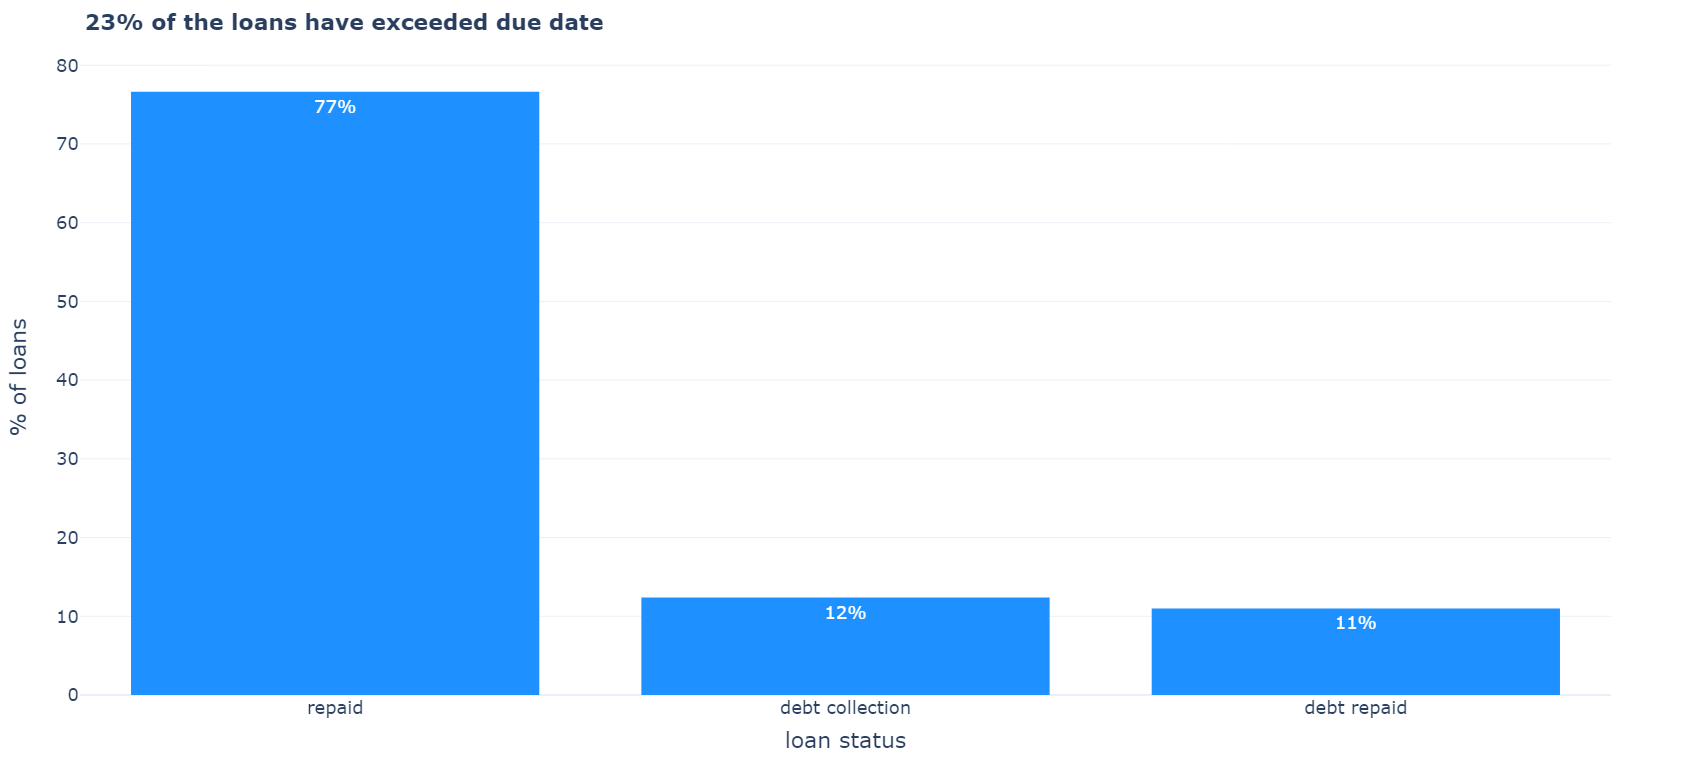

## Loan Principal Amount

**Note:** Loans typically range from more than R$6k

In [8]:
labels = []
for i in range(0, 10_000, 1_000):
    if df_loans[df_loans["amount"].between(i, i+1_000)].shape[0] > 0:
        label = f"{int(i/1_000)}k - {int((i+1_000)/1_000)}k"
        labels.append(label)
        df_loans.loc[df_loans["amount"].between(i, i+1_000), "amount_bin"] = label

In [9]:
fig = px.histogram(
    df_loans, 
    x='amount_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loans typically range from more than R$6k</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="principal loan amount (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

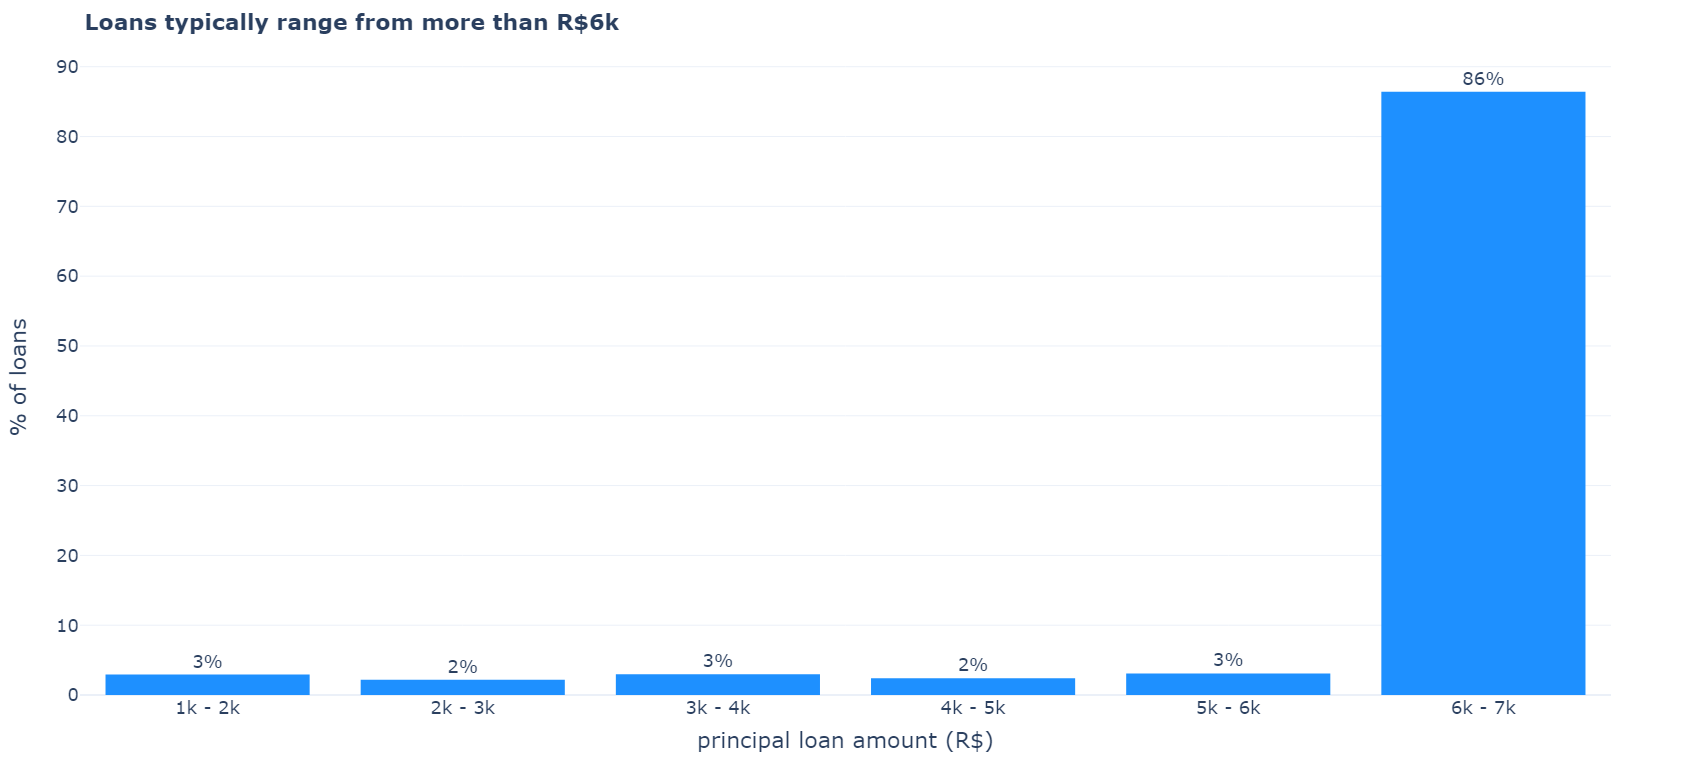

## Loan Fees

**Note:** Loan fees typically range from R$40-50

In [10]:
labels = []
for i in range(0, 60, 10):
    if df_loans[df_loans["loan_fees"].between(i, i+10)].shape[0] > 0:
        label = f"{i} - {i+10}"
        labels.append(label)
        df_loans.loc[df_loans["loan_fees"].between(i, i+10), "loan_fees_bin"] = label

In [11]:
fig = px.histogram(
    df_loans, 
    x='loan_fees_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loan fees typically range from R$40-50</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan fees (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

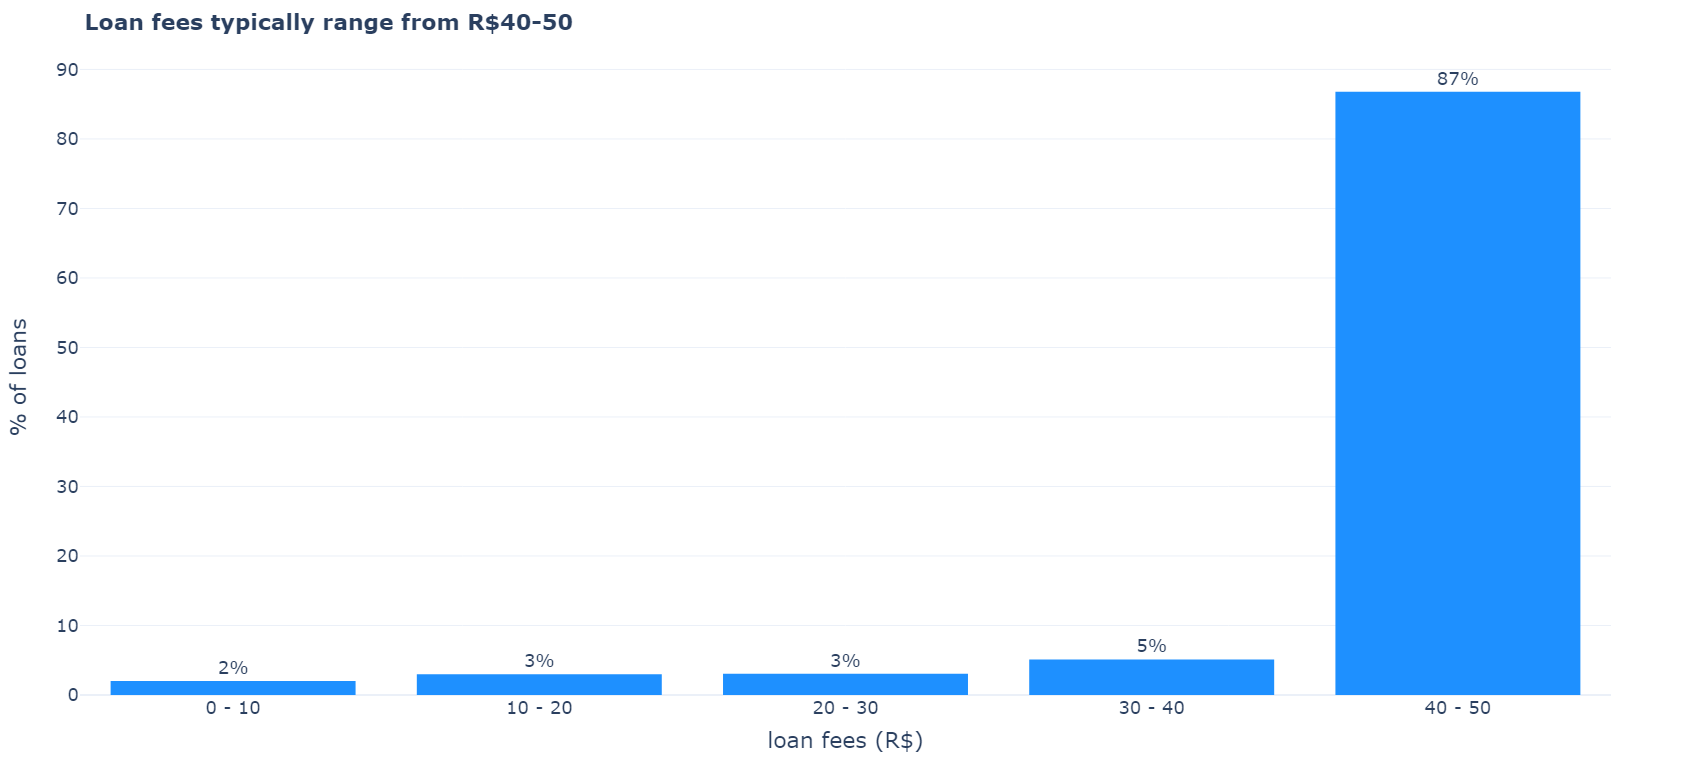

## Loan Due Amount

**Note:** Loans can range up to R$9k, if there are no repayments during the contract period

In [12]:
labels = []
for i in range(0, 15_000, 1_000):
    if df_loans[df_loans["due_amount"].between(i, i+1_000)].shape[0] > 0:
        label = f"{int(i/1_000)}k - {int((i+1_000)/1_000)}k"
        labels.append(label)
        df_loans.loc[df_loans["due_amount"].between(i, i+1_000), "due_amount_bin"] = label

In [13]:
fig = px.histogram(
    df_loans, 
    x='due_amount_bin', 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>Loans can range up to R$9k, if there are no repayments during the contract period</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="due loan amount (R$)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

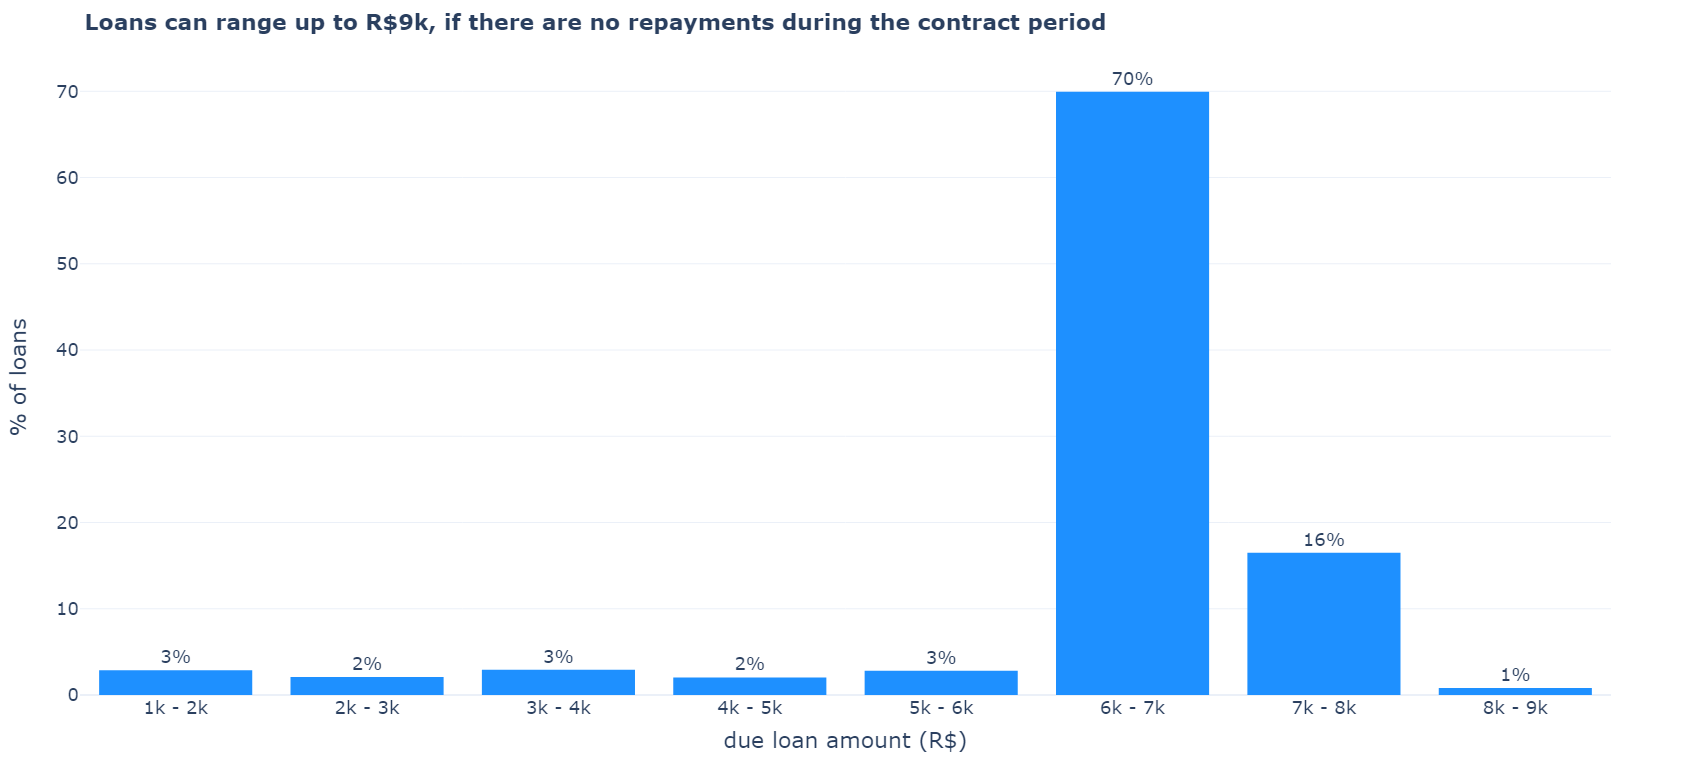

## Loan Interest Rate

**Note:** 21% of the loans have a high interest rate (above 40%)

In [14]:
labels = []
for i in range(20, 160, 10):
    if df_loans[df_loans["interest_rate"].between(i, i+10)].shape[0] > 0:
        label = f"{i} - {i+10}"
        labels.append(label)
        df_loans.loc[df_loans["interest_rate"].between(i, i+10), "interest_rate_bin"] = label

In [15]:
fig = px.histogram(
    df_loans, 
    x="interest_rate_bin", 
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]]
)

fig.update_layout(
    title='<b>21% of the loans have a high interest rate (above 40%)</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="loan interest rate (%)",
    yaxis_title="% of loans",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:,.1f}%",
    textposition="outside"
)

fig.show()

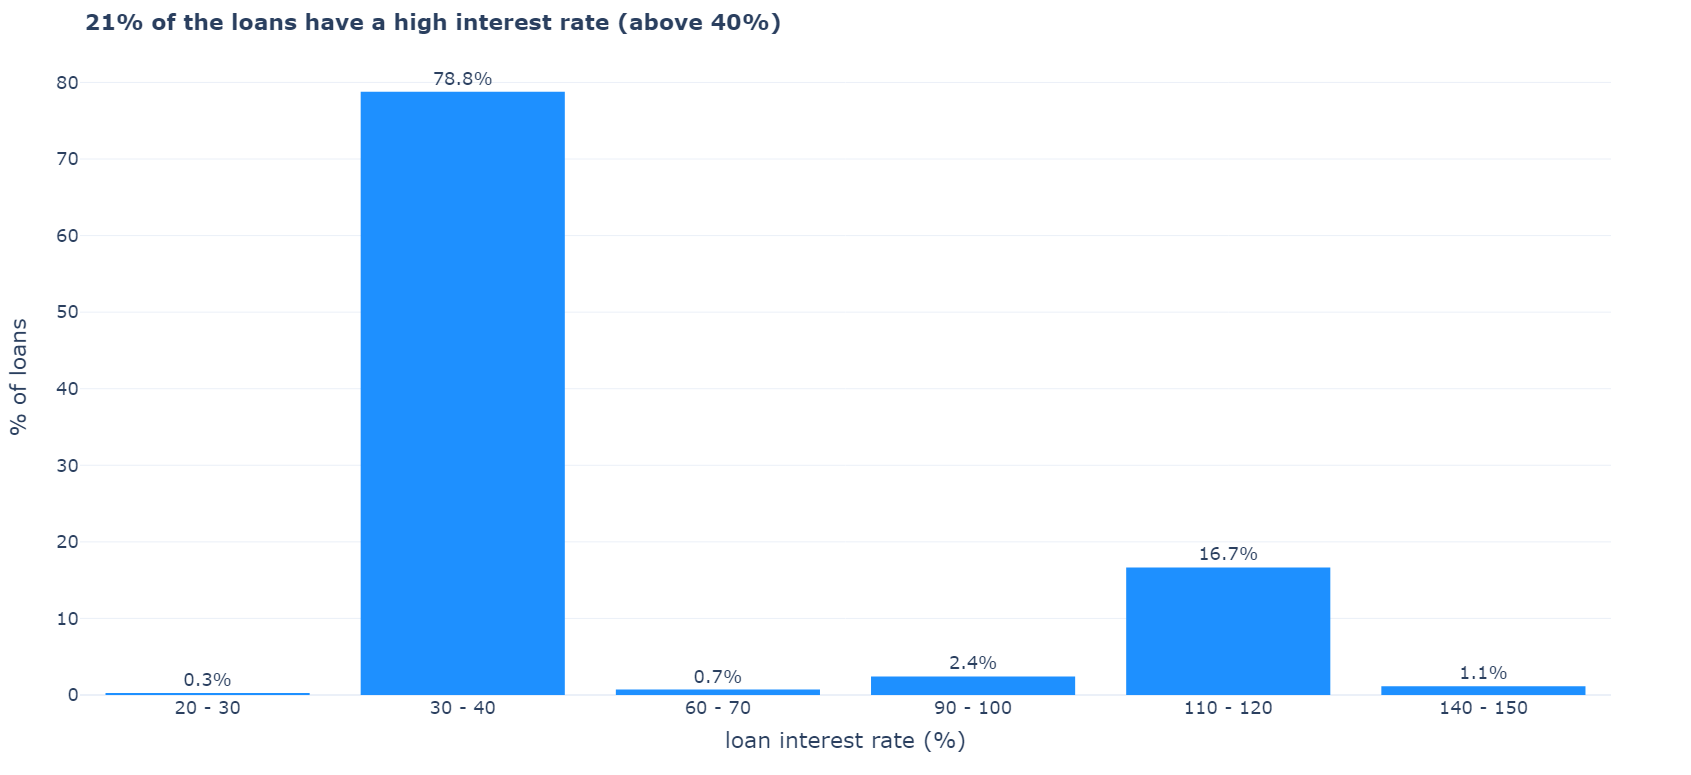

## Loan Term

**Note:** Loans typically need to be repaid in the next 3 months

In [16]:
df_loans['loan_term'].describe()

count    6595.000000
mean       90.067930
std         0.474967
min        90.000000
25%        90.000000
50%        90.000000
75%        90.000000
max       112.000000
Name: loan_term, dtype: float64

## Repayment Type

**Note:** 91% of the loan repayments are automated

In [17]:
fig = px.histogram(
    df_loan_repayments,
    x="type",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>91% of the loan repayments are automated</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment type",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

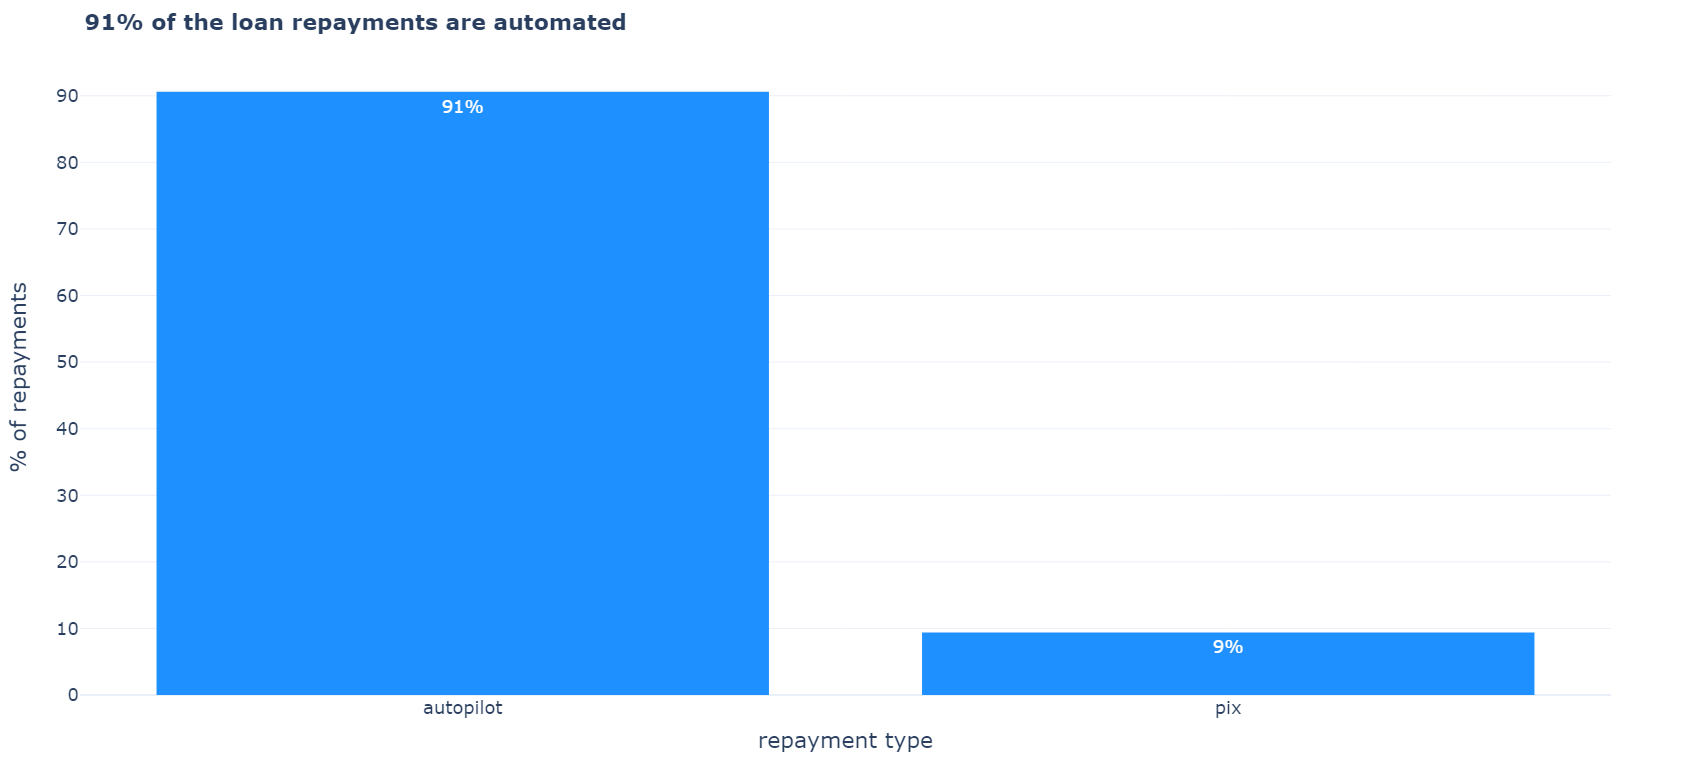

## Repayment Status

**Note:** Only 5% of the loan repayments have gone to default

In [18]:
fig = px.histogram(
    df_loan_repayments,
    x="status_cleaned",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Only 5% of the loan repayments have gone to default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment status",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

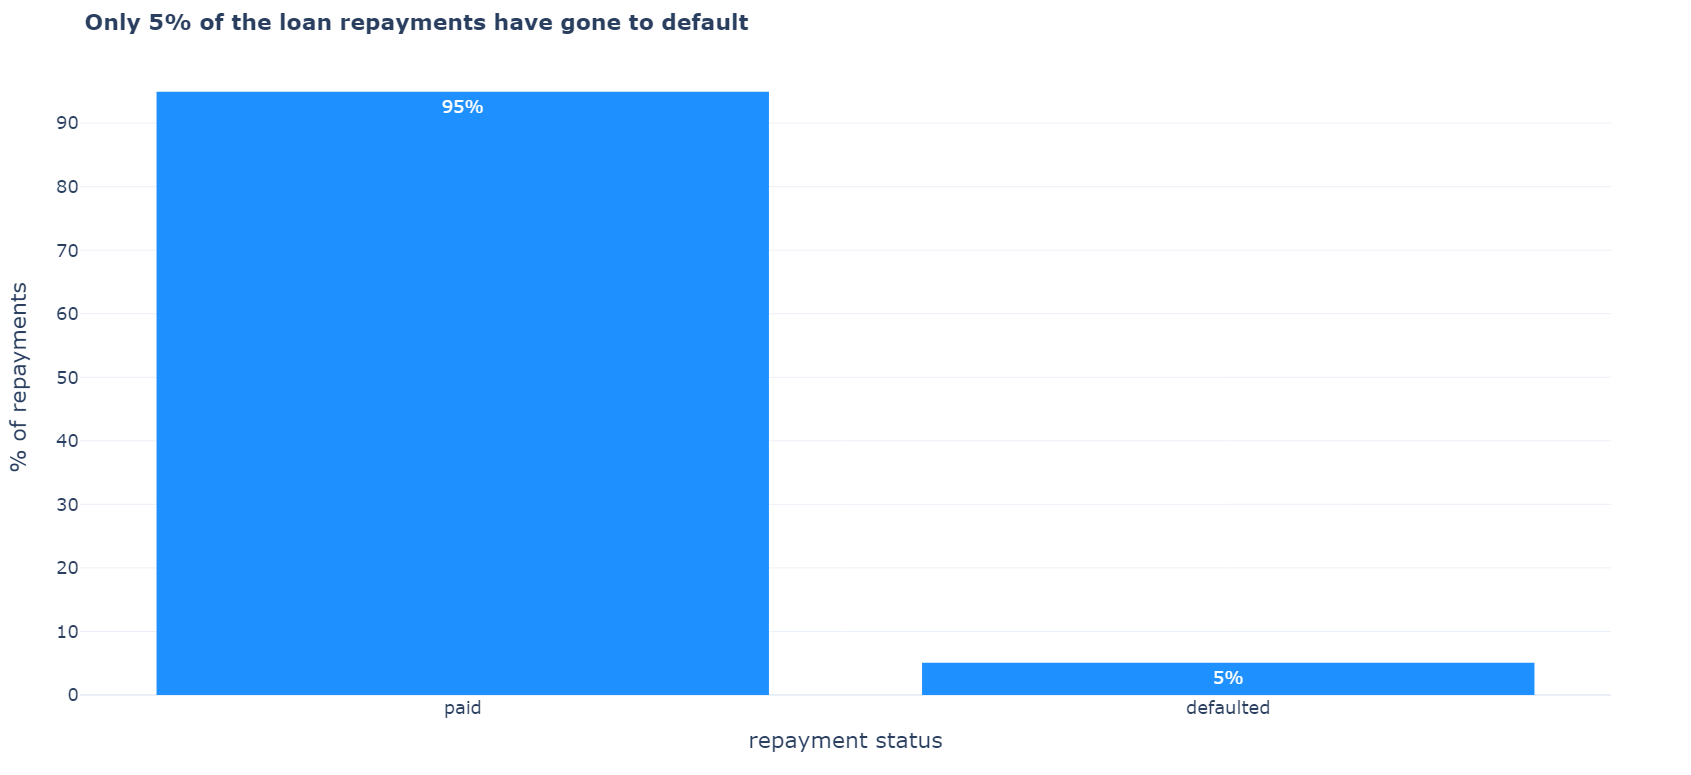

## Repayment Amount

**Note:** A typical loan repayment can range from R$27-195

In [19]:
fig = px.histogram(
    df_loan_repayments,
    x="amount",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>A typical loan repayment can range from R$27-195</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="repayment amount (R$)",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

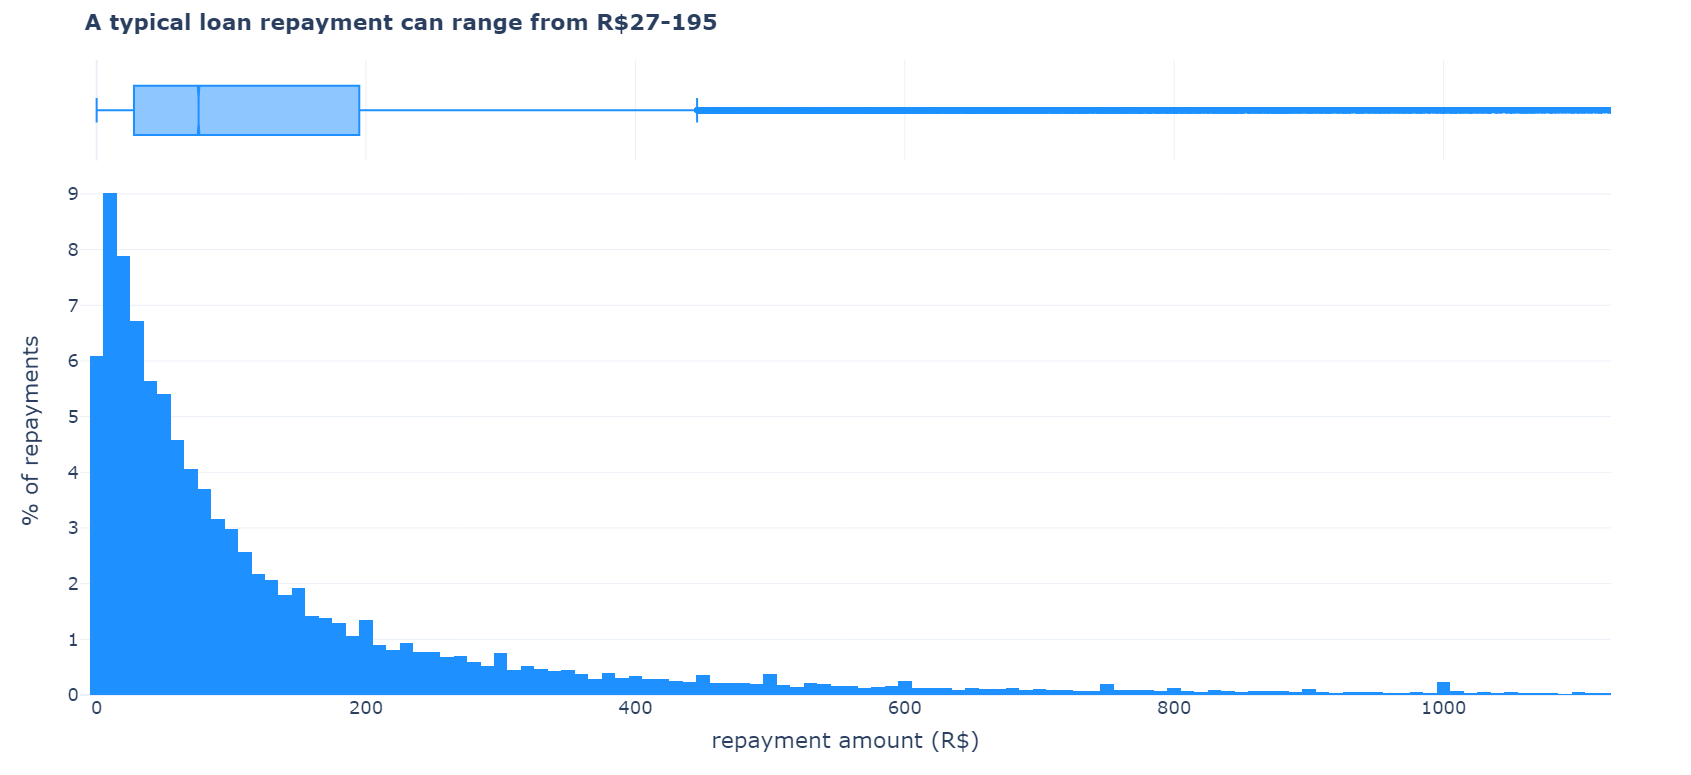

In [20]:
df_loan_repayments["amount"].describe()

count    172440.000000
mean        234.311819
std         562.375897
min           0.010000
25%          27.750000
50%          75.690000
75%         195.000000
max        7726.080000
Name: amount, dtype: float64

## Days Passed From Loan Creation To Repayment

**Note:** Typically, the first repayment happens at maximum in the next 3 days since the loan creation date

In [21]:
fig = px.histogram(
    df_loan_repayments,
    x="days_since_loan_created",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Days passed from loan creation to repayment distribution</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="days since loan creation",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

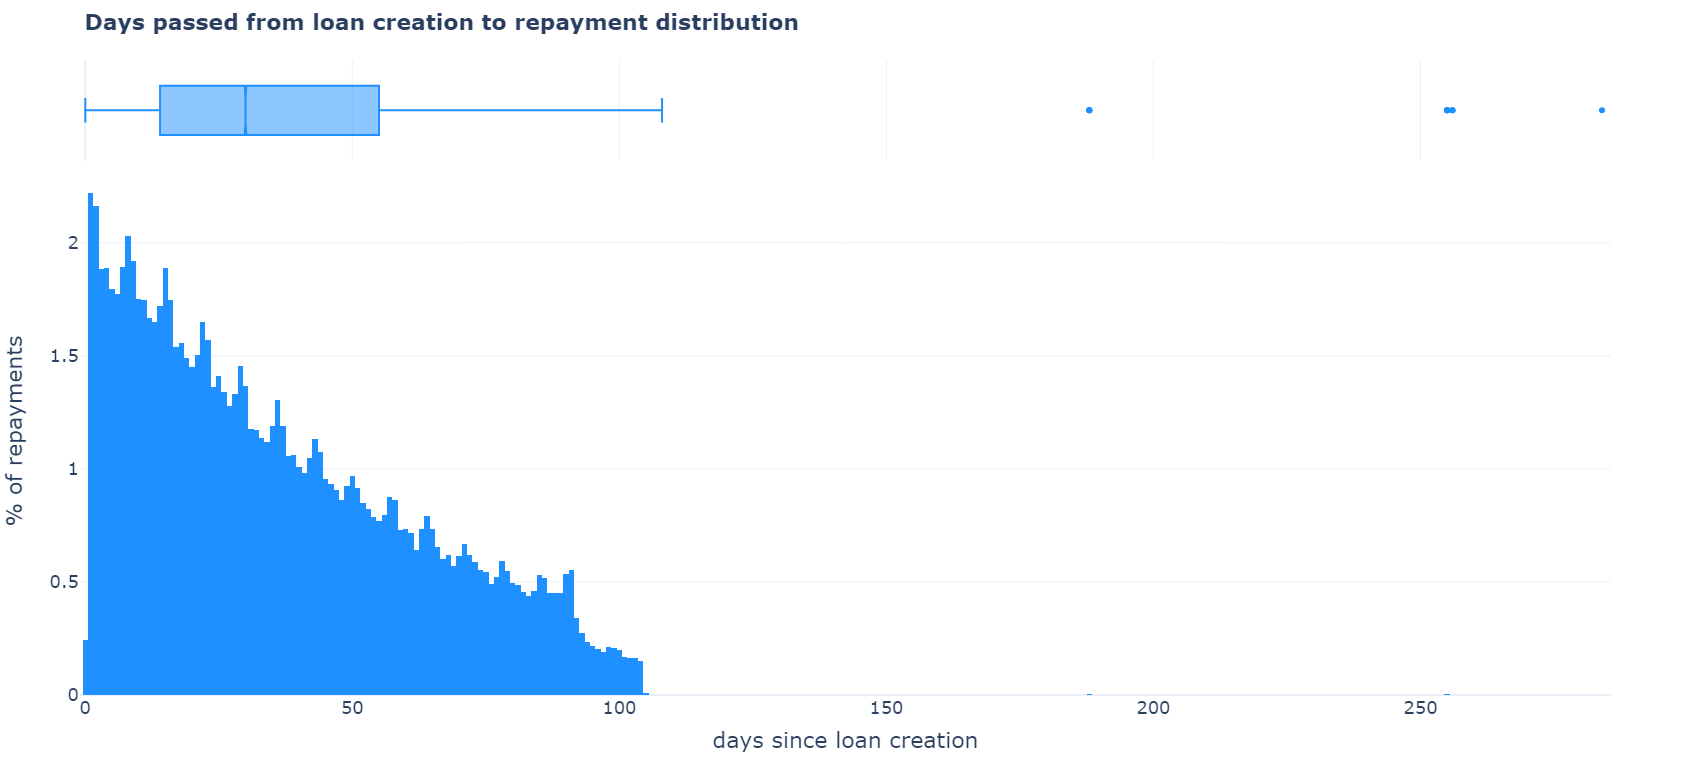

In [22]:
df_loan_repayments["days_since_loan_created"].describe()

count    172440.000000
mean         36.042177
std          26.544243
min           0.000000
25%          14.000000
50%          30.000000
75%          55.000000
max         481.000000
Name: days_since_loan_created, dtype: float64

In [23]:
# time between first repayment and loan creation date
# typically, the first repayment happens at maximum in the next 3 days since the loan creation date
df_loan_repayments \
.sort_values(by=["loan_id", "created_at"]) \
.groupby("loan_id", as_index=False) \
.first() \
["days_since_loan_created"].describe()

count    6595.000000
mean        4.006065
std         9.005422
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       104.000000
Name: days_since_loan_created, dtype: float64

## Late Repayment

**Note:** 
- Only 3% of loan repayments have exceeded the loan due date.
- Late repayments can happen between 1-10 days after the loan due date.
- On average, loans exceed due date by 3-4 repayments

In [24]:
df_loan_repayments["due_date_exceeded"] = df_loan_repayments["due_date_exceeded"].replace({0: "not exceeded", 1: "exceeded"})

In [25]:
fig = px.histogram(
    df_loan_repayments,
    x="due_date_exceeded",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Only 3% of loan repayments have exceeded the loan due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="due date exceeded",
    yaxis_title="% of repayments",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

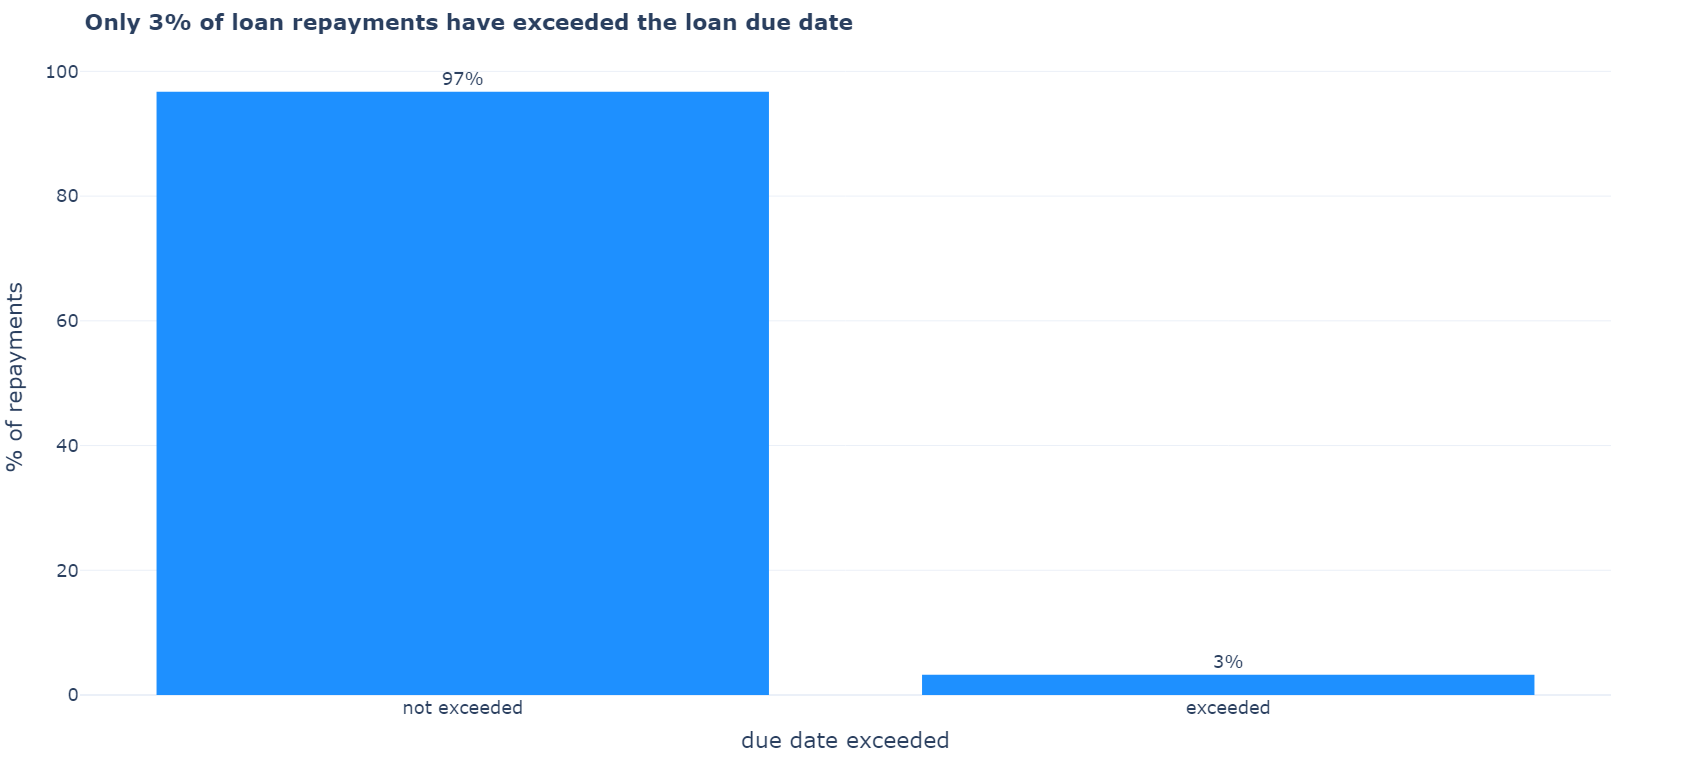

In [26]:
fig = px.histogram(
    df_loan_repayments[df_loan_repayments["days_since_due_date"] > 0],
    x="days_since_due_date",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Late repayments can happen between 1-10 days after the loan due date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="days since due date",
    yaxis_title="% of repayments",
    template=template,
)

fig.show()

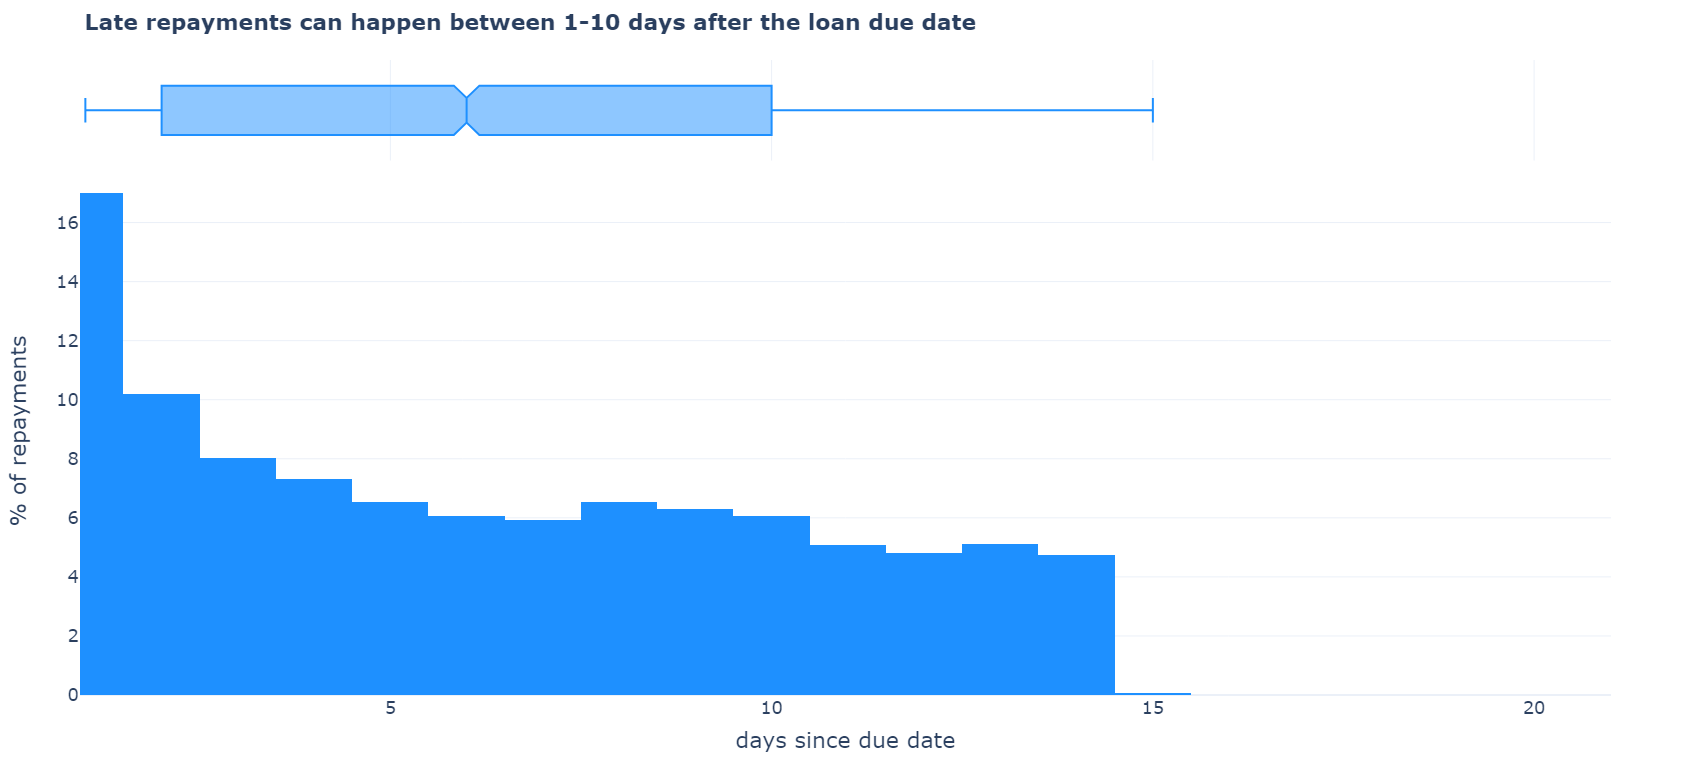

In [27]:
df_loan_repayments[df_loan_repayments["days_since_due_date"] > 0]["days_since_due_date"].describe()

count    5627.000000
mean        6.673716
std        10.546824
min         1.000000
25%         2.000000
50%         6.000000
75%        10.000000
max       391.000000
Name: days_since_due_date, dtype: float64

In [28]:
df_temp = df_loan_repayments.groupby("loan_id", as_index=False)["num_late_repayments"].max()

fig = px.histogram(
    df_temp[df_temp["num_late_repayments"] > 0],
    x="num_late_repayments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>On average, loans exceed due date by 3-4 repayments</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of late repayments",
    yaxis_title="% of loan",
    template=template,
)

fig.show()

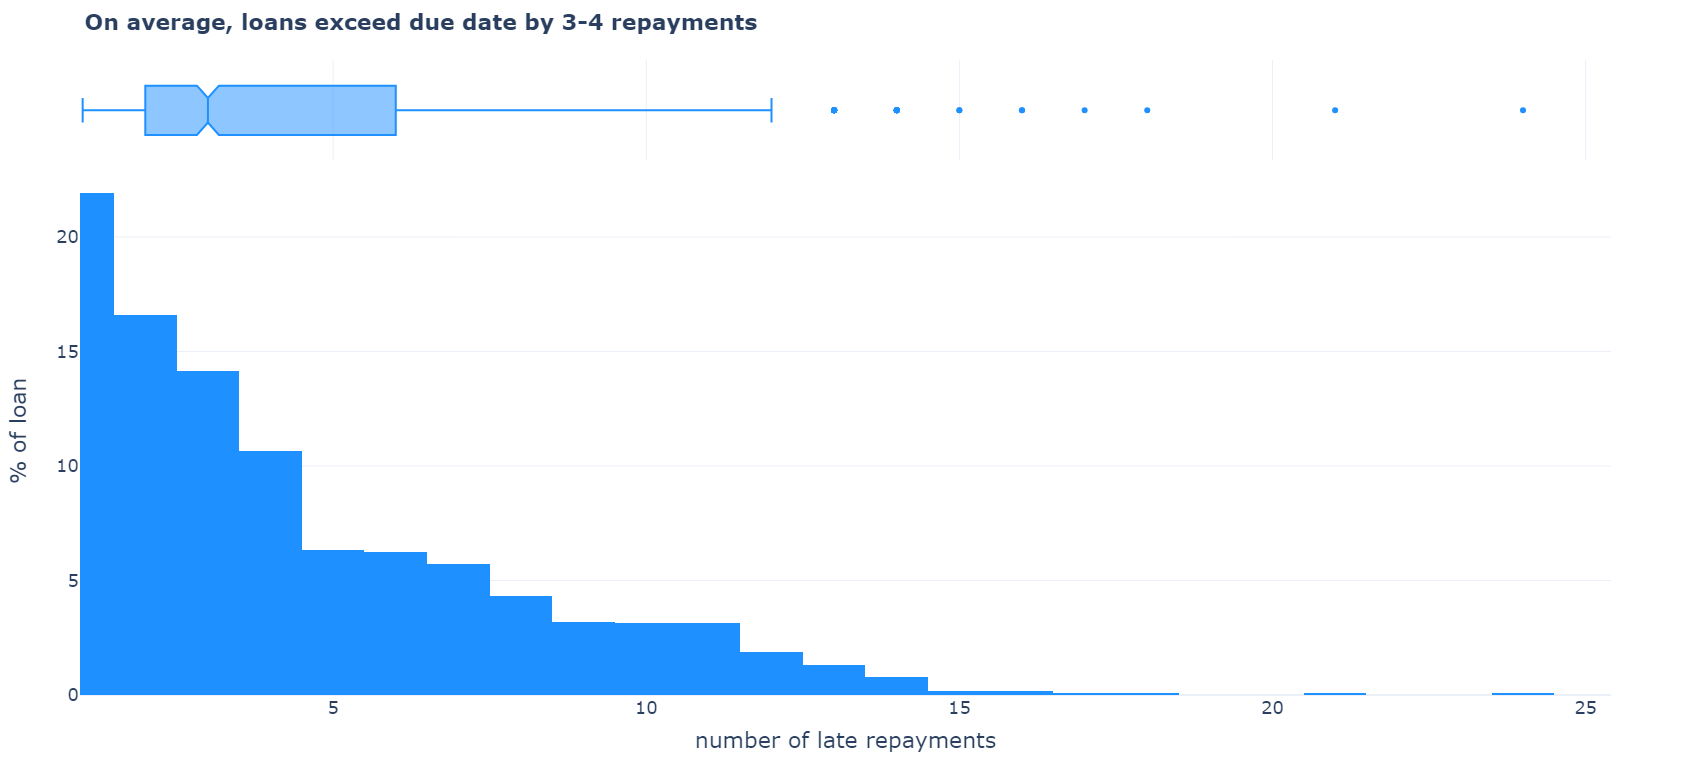

In [29]:
df_temp[df_temp["num_late_repayments"] > 0]["num_late_repayments"].describe()

count    1278.000000
mean        4.402973
std         3.450224
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        24.000000
Name: num_late_repayments, dtype: float64

## Repayment Lag 

**Note:** Typically, repayments happen every 1-2 days

In [30]:
df_loan_repayments["days_lag_repayment"].describe()

count    172440.000000
mean          2.139799
std           4.217014
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         480.000000
Name: days_lag_repayment, dtype: float64

## Median Basket

**Note:** A typical user spends around R$90-660 in purchases

In [31]:
# avg_basket
fig = px.histogram(
    df_users,
    x="median_basket",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>A typical user spends around R$90-660 in purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="spendings (R$)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

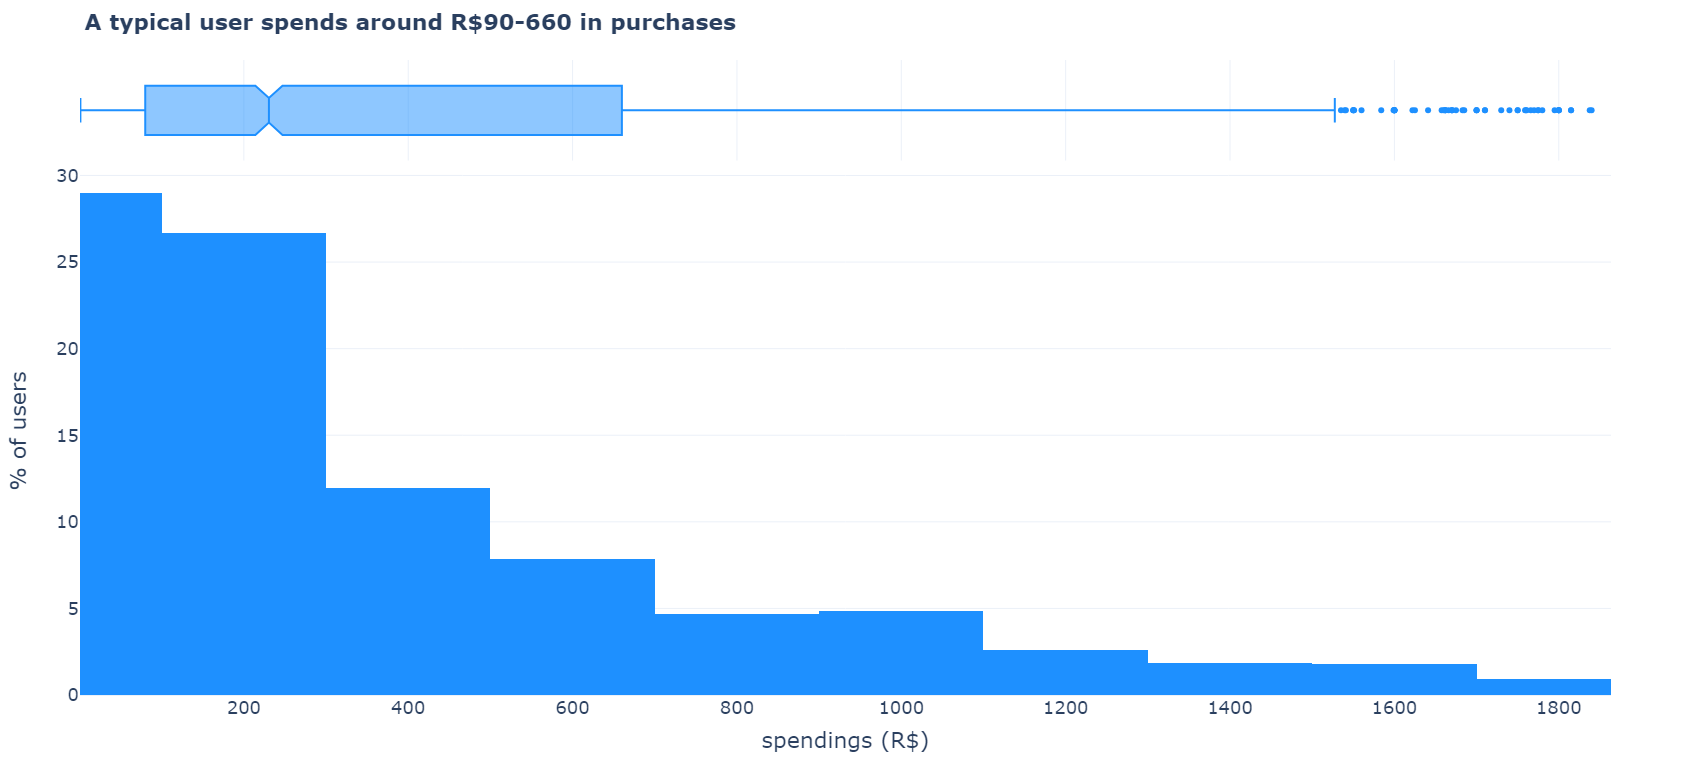

In [32]:
df_users["median_basket"].describe()

count     3048.000000
mean       634.436460
std       1272.040417
min          1.100000
25%         80.000000
50%        230.500000
75%        660.000000
max      18000.000000
Name: median_basket, dtype: float64

## Card Type Preference

**Note:** 82% of the users prefer to make purchases using a credit card

In [33]:
df_users["credit_debit_preference"] = np.where(df_users['rate_credit_debit'] <= 1, "debit", "credit")

In [34]:
fig = px.histogram(
    df_users,
    x="credit_debit_preference",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>82% of the users prefer to make purchases using a credit card</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="card type preference",
    yaxis_title="% of users",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

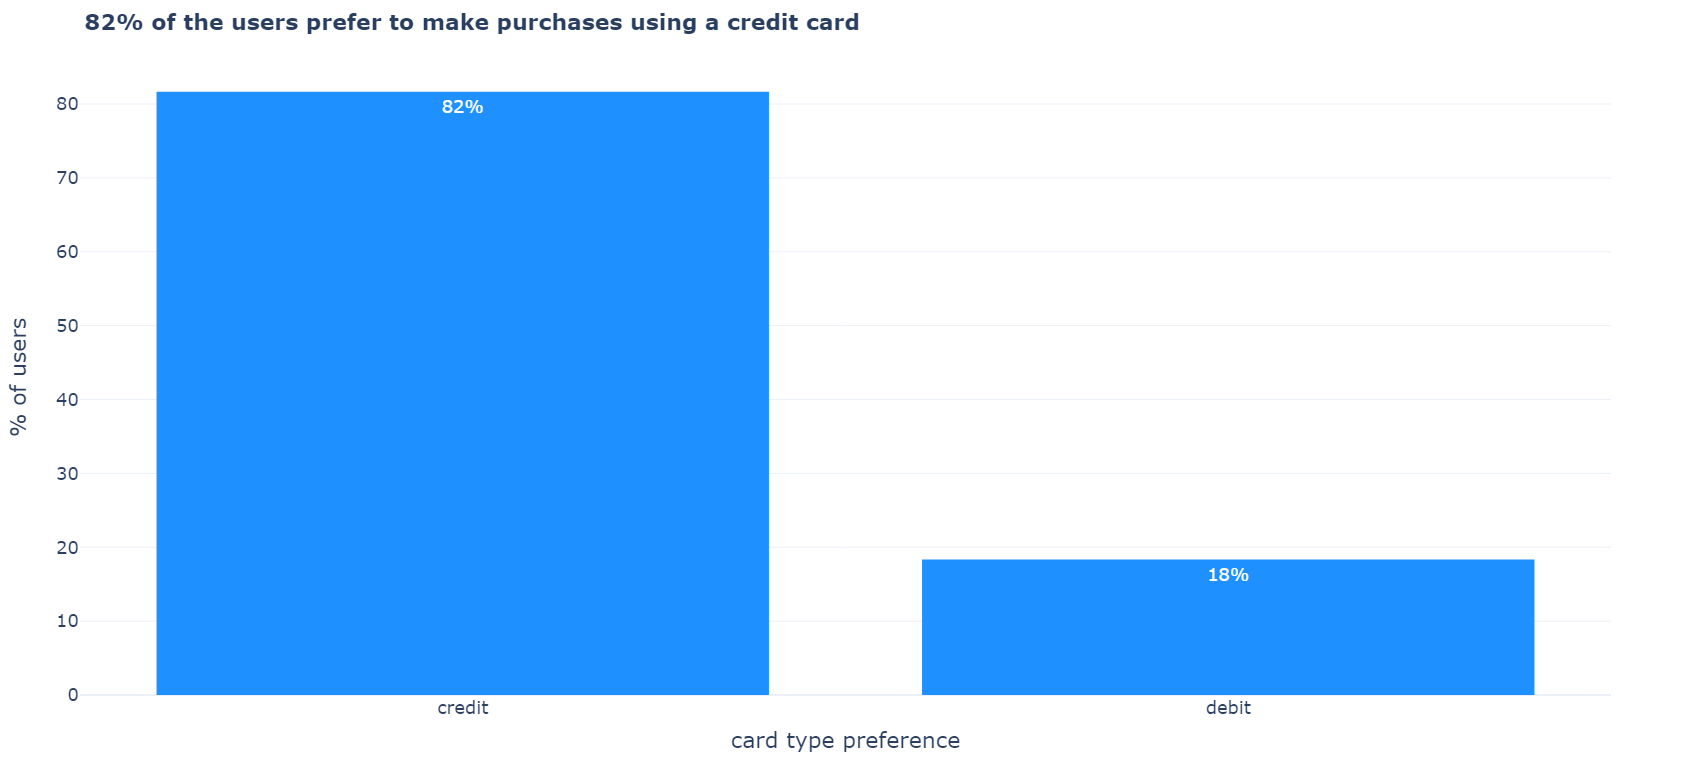

## Installment Preference

**Note:** Users typically finance 25% to 75% of their purchases through installment plans

In [35]:
fig = px.histogram(
    df_users,
    x="rate_transactions_installment",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users typically finance 25% to 75% of their purchases through installment plans</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of transactions with installments",
    yaxis_title="% of users",
    template=template,
)

fig.show()

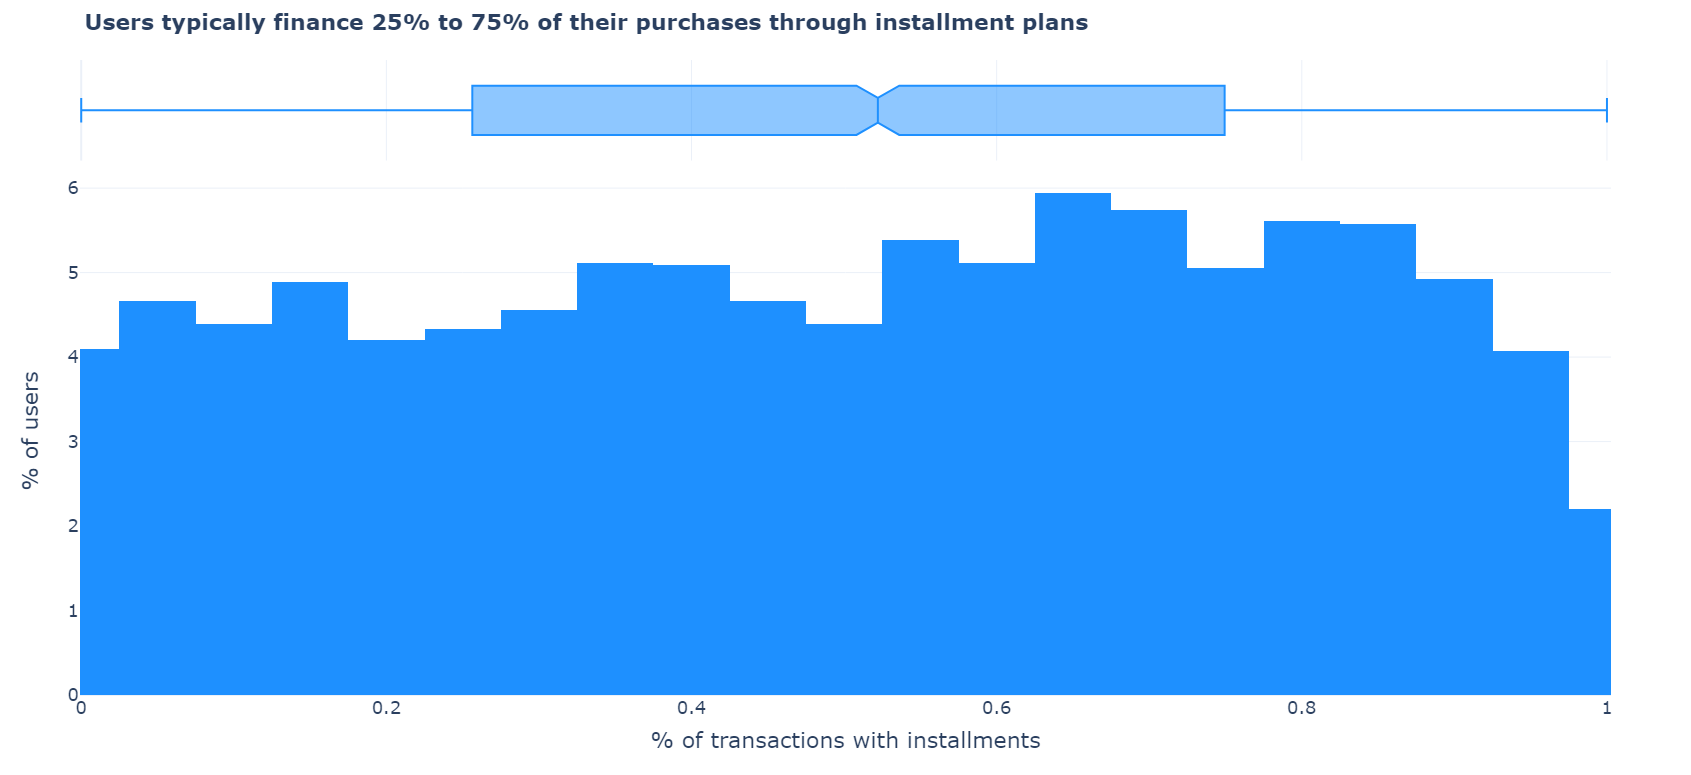

In [36]:
df_users["rate_transactions_installment"].astype(float).describe()

count    3048.000000
mean        0.502776
std         0.288628
min         0.000000
25%         0.256370
50%         0.522134
75%         0.749128
max         1.000000
Name: rate_transactions_installment, dtype: float64

## Installments

**Note:** Users typically opt for installment plans ranging from 2-5 payments for their purchases

In [37]:
df_users["avg_intallments"] = df_users["avg_intallments"].round()

In [38]:
fig = px.histogram(
    df_users,
    x="avg_intallments",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users typically opt for installment plans ranging from 2-5 payments for their purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="number of installments",
    yaxis_title="% of users",
    template=template,
)

fig.show()

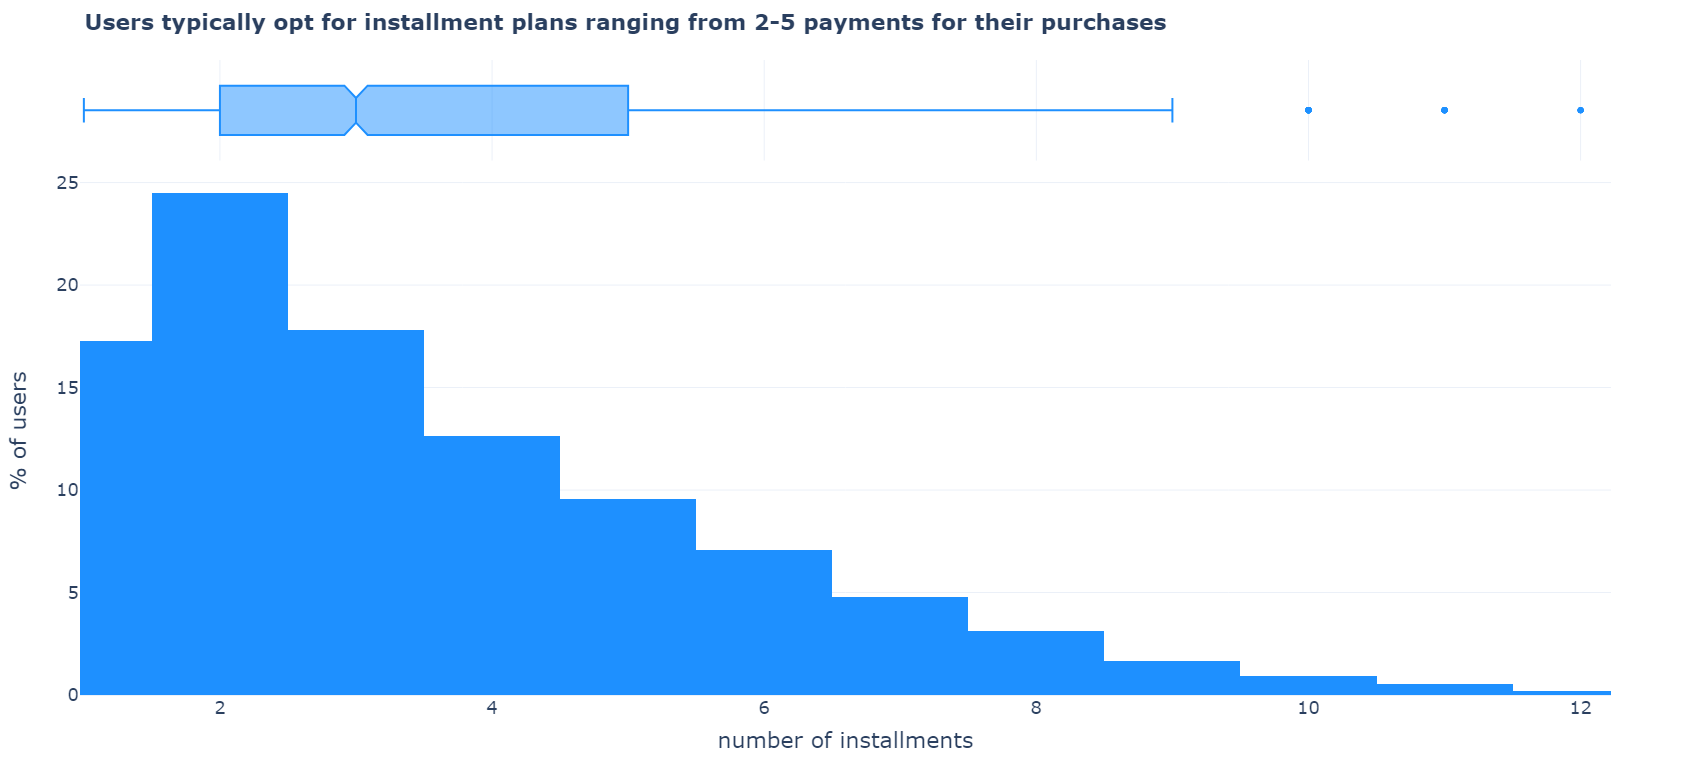

In [39]:
df_users["avg_intallments"].describe()

count    3048.000000
mean        3.510827
std         2.216361
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        12.000000
Name: avg_intallments, dtype: float64

## Denied Transactions

**Note:** Users encounter denied transactions, less than 20% of time

In [40]:
fig = px.histogram(
    df_users,
    x="rate_denied",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Users encounter denied transactions, less than 20% of time</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="denied transactions ratio",
    yaxis_title="% of users",
    template=template,
)

fig.show()

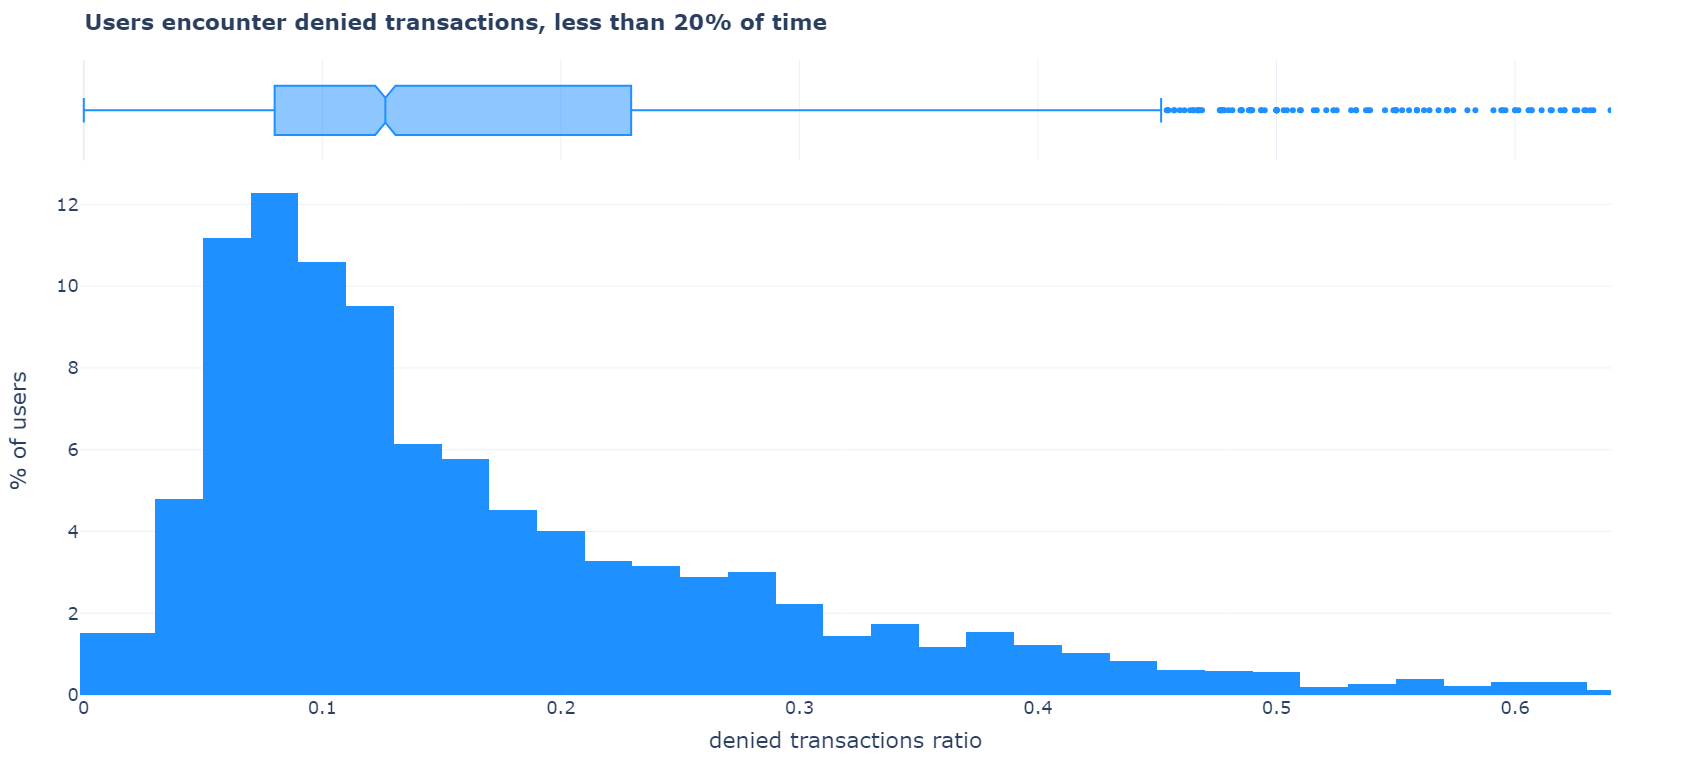

In [41]:
df_users["rate_denied"].describe()

count    3048.000000
mean        0.172197
std         0.133207
min         0.000000
25%         0.080000
50%         0.126421
75%         0.229436
max         0.857585
Name: rate_denied, dtype: float64

## Transaction Lag

**Note:** Our base consists of the users that are active purchasers (active is considered someone who makes frequent purchases, with a maximum lag of a week)

In [42]:
fig = px.histogram(
    df_users,
    x="avg_lag_transaction",
    histnorm="percent",
    marginal="box",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>96% of the users are active purchasers</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="transaction lag (days)",
    yaxis_title="% of users",
    template=template,
)

fig.show()

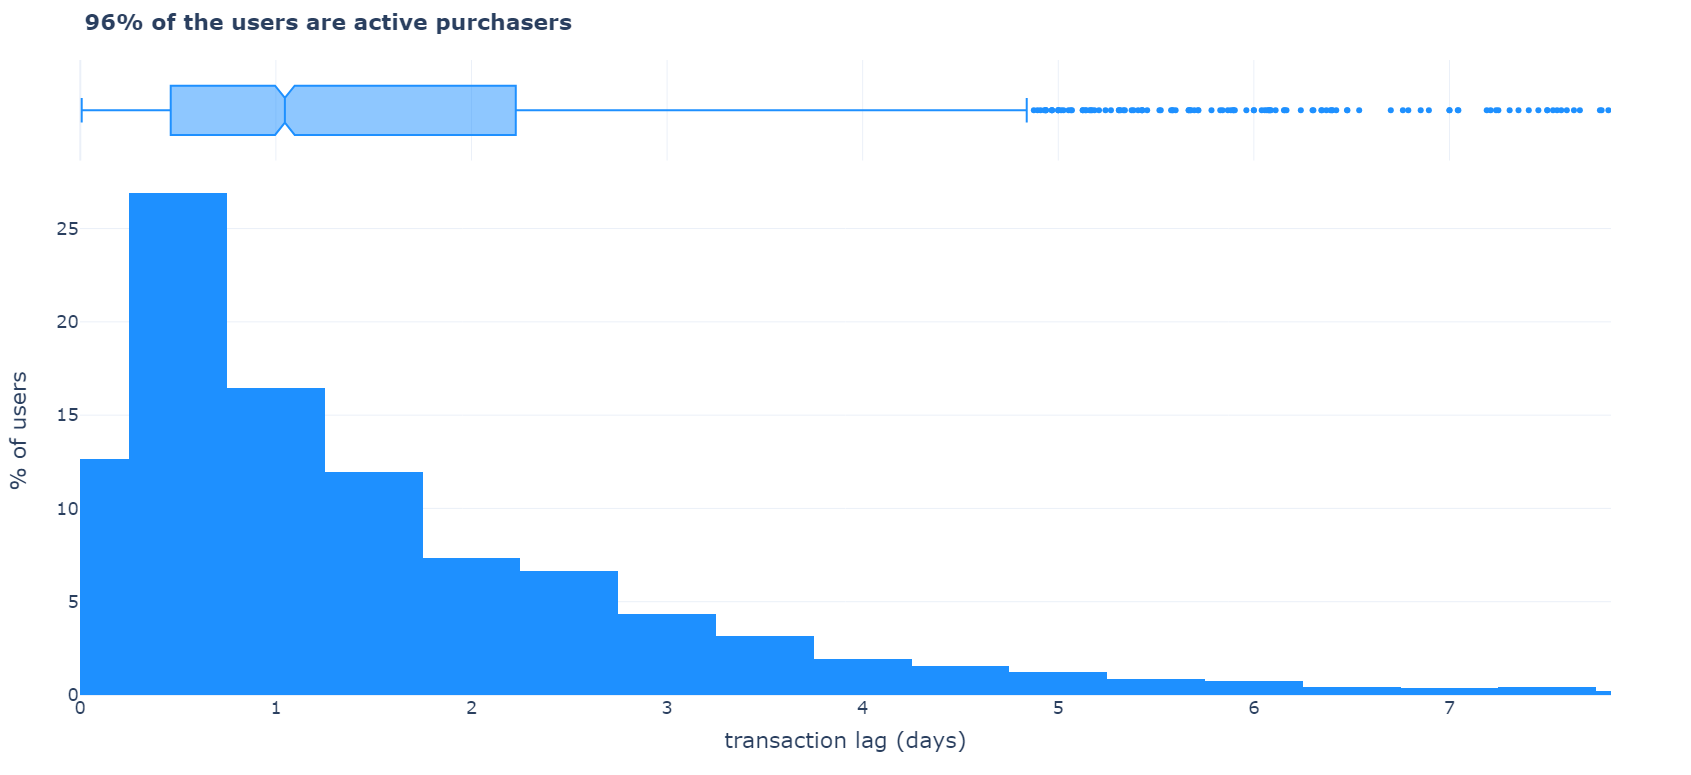

In [43]:
df_users["avg_lag_transaction"].describe()

count    3046.000000
mean        1.836044
std         2.827839
min         0.007171
25%         0.462581
50%         1.045914
75%         2.225168
max        62.000000
Name: avg_lag_transaction, dtype: float64

## Purchases Mode

**Note:** Our base consists of users who value in-person purchases

In [44]:
df_users["online_person_preference"] = np.where(df_users["ratio_online_person"] <= 1, "in-person", "online")

In [45]:
fig = px.histogram(
    df_users,
    x="online_person_preference",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>Our base consists of users who value in-person purchases</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="purchase type",
    yaxis_title="% of users",
    template=template,
)
fig.update_xaxes(
    categoryorder="total descending"
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="outside"
)

fig.show()

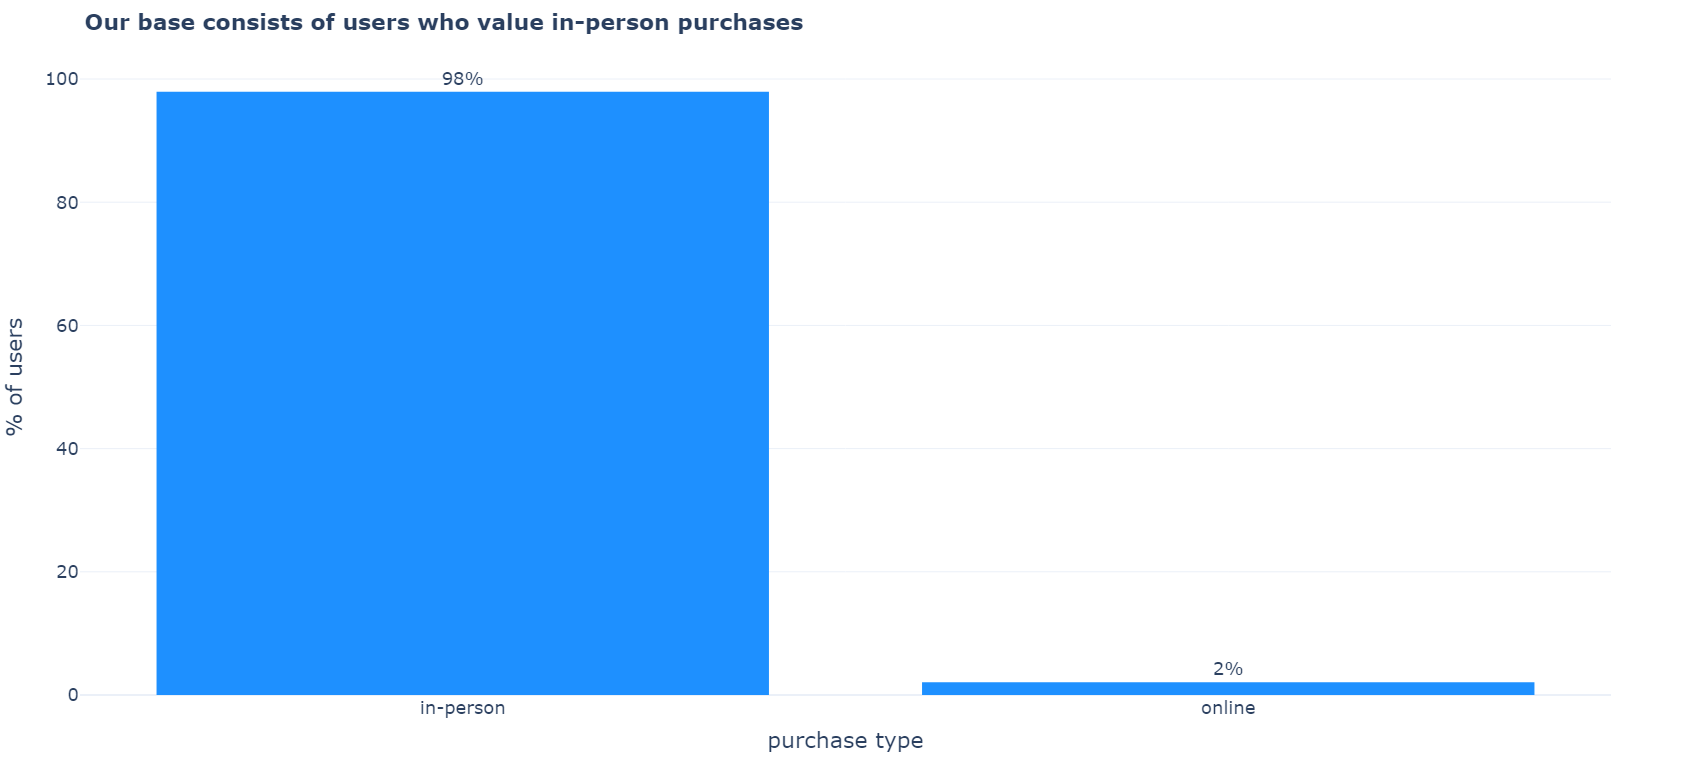

# RFM Analysis

- Customer (User) Behavior Segmentation based on RFM Analysis
- Recency (R), Frequency (F), Monetary (M)

## Metrics

| Recency | Frequency | Monetary |
| :-----: | :-------: | :------: |
| up to 1 month (1) | more than 500 (1) | more than R\\$ 500k (1) |
| 1 to 3 months (2) | 100 to 500 (2) | R\\$ 100k to 500k (2) |
| more than 3 months (3) | less than 100 (3) | less than R\\$100k (3) |t |

In [46]:
df_users[["recency", "frequency", "monetary"]].describe()

,recency,frequency,monetary
count,3048.000000,3048.000000,3.048000e+03
mean,125.481955,473.312008,6.583255e+05
std,91.243150,1046.560185,1.950145e+07
min,0.000000,1.000000,4.150000e+01
25%,42.000000,73.750000,5.350312e+04
50%,105.000000,178.500000,1.032729e+05
75%,196.000000,461.250000,1.982776e+05
max,358.000000,25660.000000,1.000132e+09


In [47]:
# Recency buckets
# Higher values indicate users who haven't made a purchase for a long time (not active)
# q1, q3 = df_users["recency"].quantile(.25), df_users["recency"].quantile(.75)

df_users.loc[df_users["recency"] <= 30, "recency_bin"] = "1"
df_users.loc[df_users["recency"].between(30, 90, inclusive="right"), "recency_bin"] = "2"
df_users.loc[df_users["recency"] > 90, "recency_bin"] = "3"

In [48]:
# Frequency buckets
# Higher values indicate users who make frequent purchases (more active)
q1, q3 = df_users["frequency"].quantile(.25), df_users["frequency"].quantile(.75)

df_users.loc[df_users["frequency"] <= 100, "frequency_bin"] = "3"
df_users.loc[df_users["frequency"].between(100, 500, inclusive="right"), "frequency_bin"] = "2"
df_users.loc[df_users["frequency"] > 500, "frequency_bin"] = "1"

In [49]:
# Monetary buckets
# Higher values indicate users with higher spendings
q1, q3 = df_users["monetary"].quantile(.25), df_users["monetary"].quantile(.75)

df_users.loc[df_users["monetary"] <= 100_000, "monetary_bin"] = "3"
df_users.loc[df_users["monetary"].between(100_000, 500_000, inclusive="right"), "monetary_bin"] = "2"
df_users.loc[df_users["monetary"] > 500_000, "monetary_bin"] = "1"

## Scores

In [50]:
df_users["rfm_segment"] = df_users["recency_bin"] + df_users["frequency_bin"] + df_users["monetary_bin"]

In [51]:
# define customer clusters based on RFM Analysis
cluster_1 = ["111", "113", "112"]  # Champions # Loyal Customers
cluster_2 = ["121", "231", "221", "211"]  # Big Spenders
cluster_3 = ["213", "122", "123", "212", "222", "223", "311", "313", "312"]  # Promising Customers
cluster_4 = ["131", "132", "133", "232", "233"]  # Recent Customers
cluster_5 = ["331", "332", "333", "321", "322", "323"]  # Inactive Customers

clusters = list(
    zip(
        [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5],
        ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]
    )
)

for cluster, label in clusters:
    df_users.loc[df_users["rfm_segment"].isin(cluster), "rfm_segment_desc"] = label

## Analysis

In [52]:
fig = px.histogram(
    df_users,
    x="rfm_segment_desc",
    histnorm="percent",
    color_discrete_sequence=[colors["dark_blue"]],
)

fig.update_layout(
    title="<b>83% of the users are frequent buyers, with moderate to modest spending habits</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="user segment",
    yaxis_title="% of user",
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=[label for cluster, label in clusters]
)
fig.update_traces(
    texttemplate="%{y:,.0f}%",
    textposition="inside"
)

fig.show()

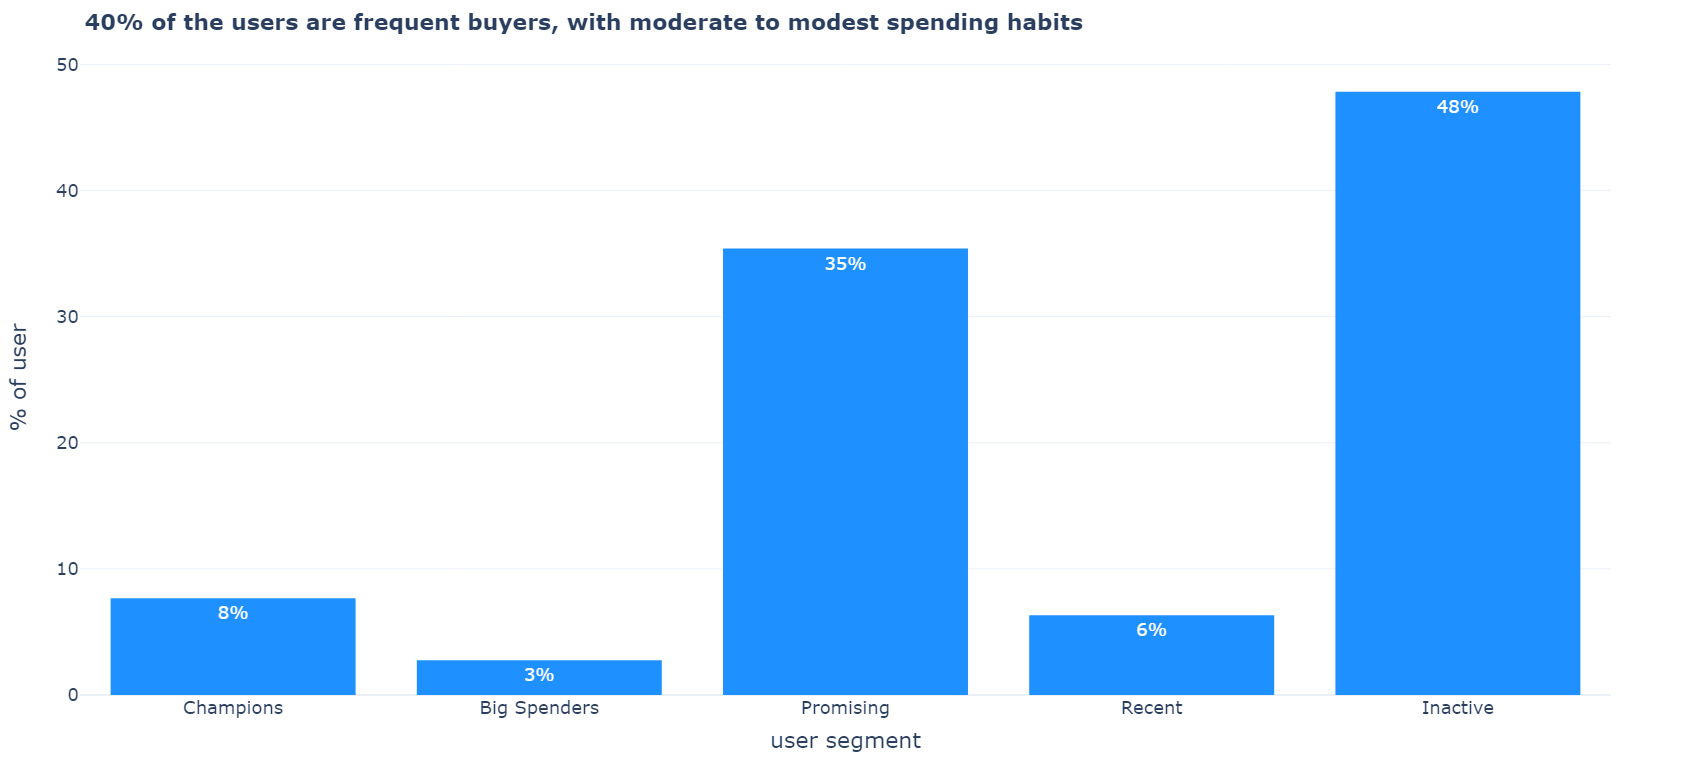

In [53]:
fig = px.box(
    df_users, 
    x="rfm_segment_desc", 
    y="recency",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["medium_blue"], colors["dark_blue"], colors["dark_blue"], colors["medium_blue"], colors["dark_blue"],]
)

fig.update_layout(
    title="<b>Recency distribution per user (customer) segment</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="user segment",
    yaxis_title="Recency (days)",
    showlegend=False,
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=[label for cluster, label in clusters]
)

fig.show()

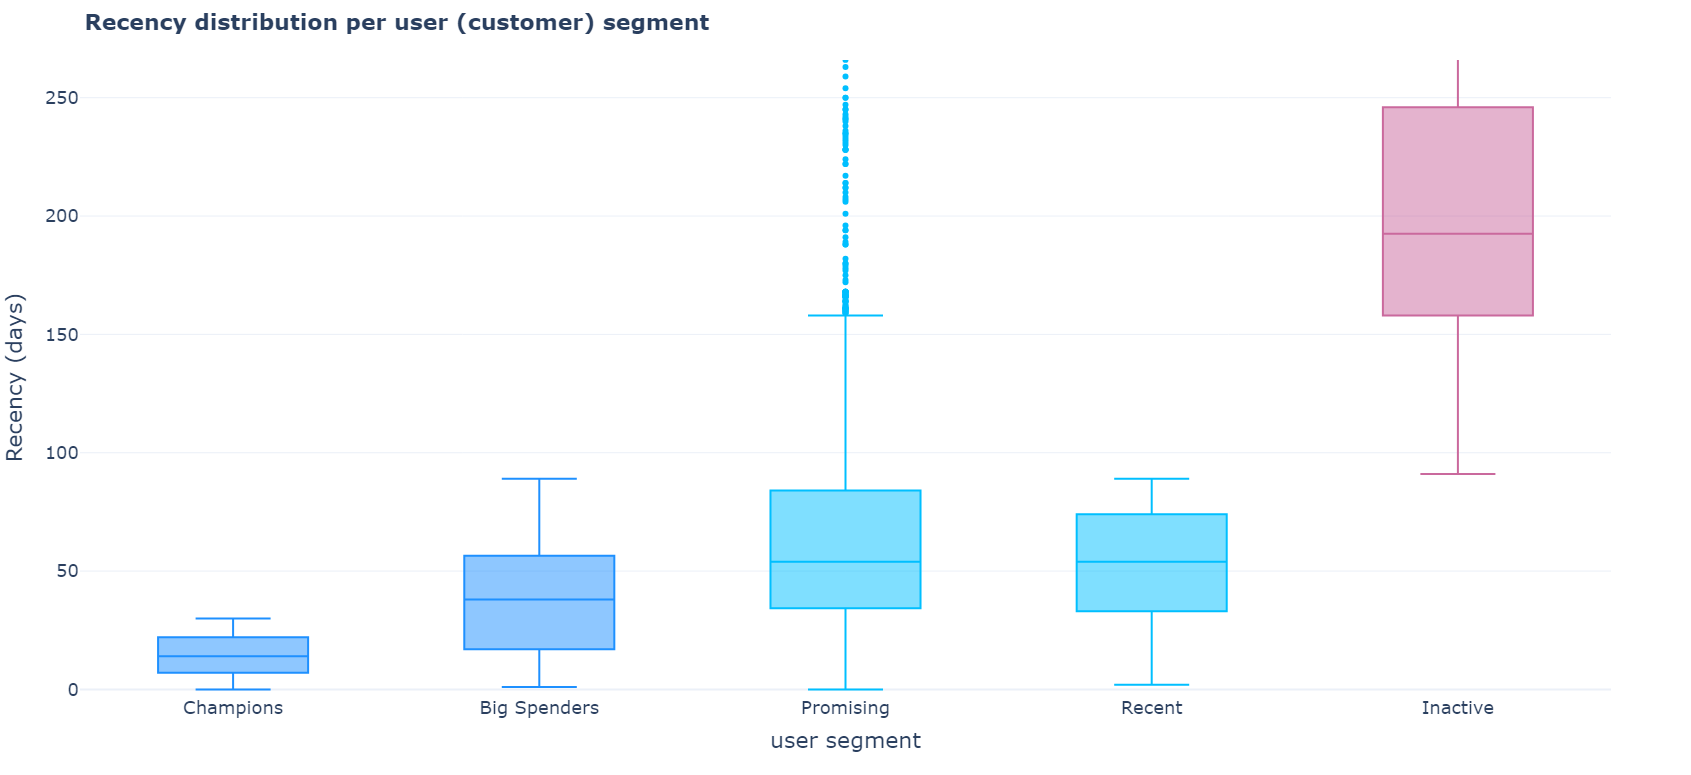

In [54]:
fig = px.box(
    df_users, 
    x="rfm_segment_desc", 
    y="frequency",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["medium_blue"], colors["dark_blue"], colors["dark_blue"], colors["medium_blue"], colors["dark_blue"],]
)

fig.update_layout(
    title="<b>Frequency distribution per user (customer) segment</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="user segment",
    yaxis_title="Frequency<br>(number of purchases)",
    showlegend=False,
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=[label for cluster, label in clusters]
)

fig.show()

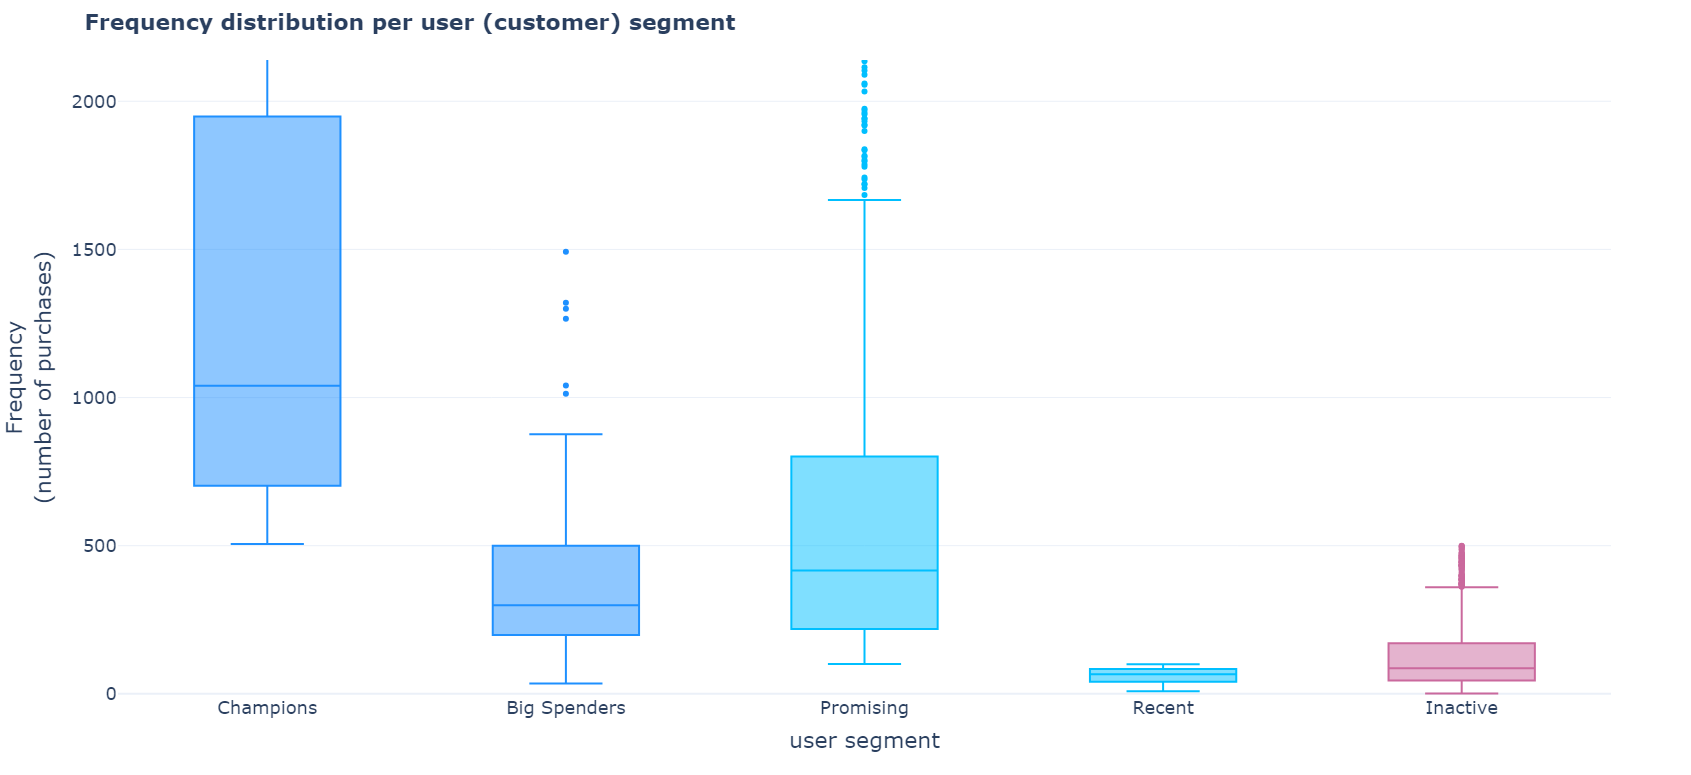

In [55]:
fig = px.box(
    df_users, 
    x="rfm_segment_desc", 
    y="monetary",
    color="rfm_segment_desc",
    color_discrete_sequence=[colors["dark_purple"], colors["medium_blue"], colors["dark_blue"], colors["dark_blue"], colors["medium_blue"], colors["dark_blue"],]
)

fig.update_layout(
    title="<b>Monetary amount distribution per user (customer) segment</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="user segment",
    yaxis_title="Monetary amount (R$)",
    showlegend=False,
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=[label for cluster, label in clusters]
)

fig.show()

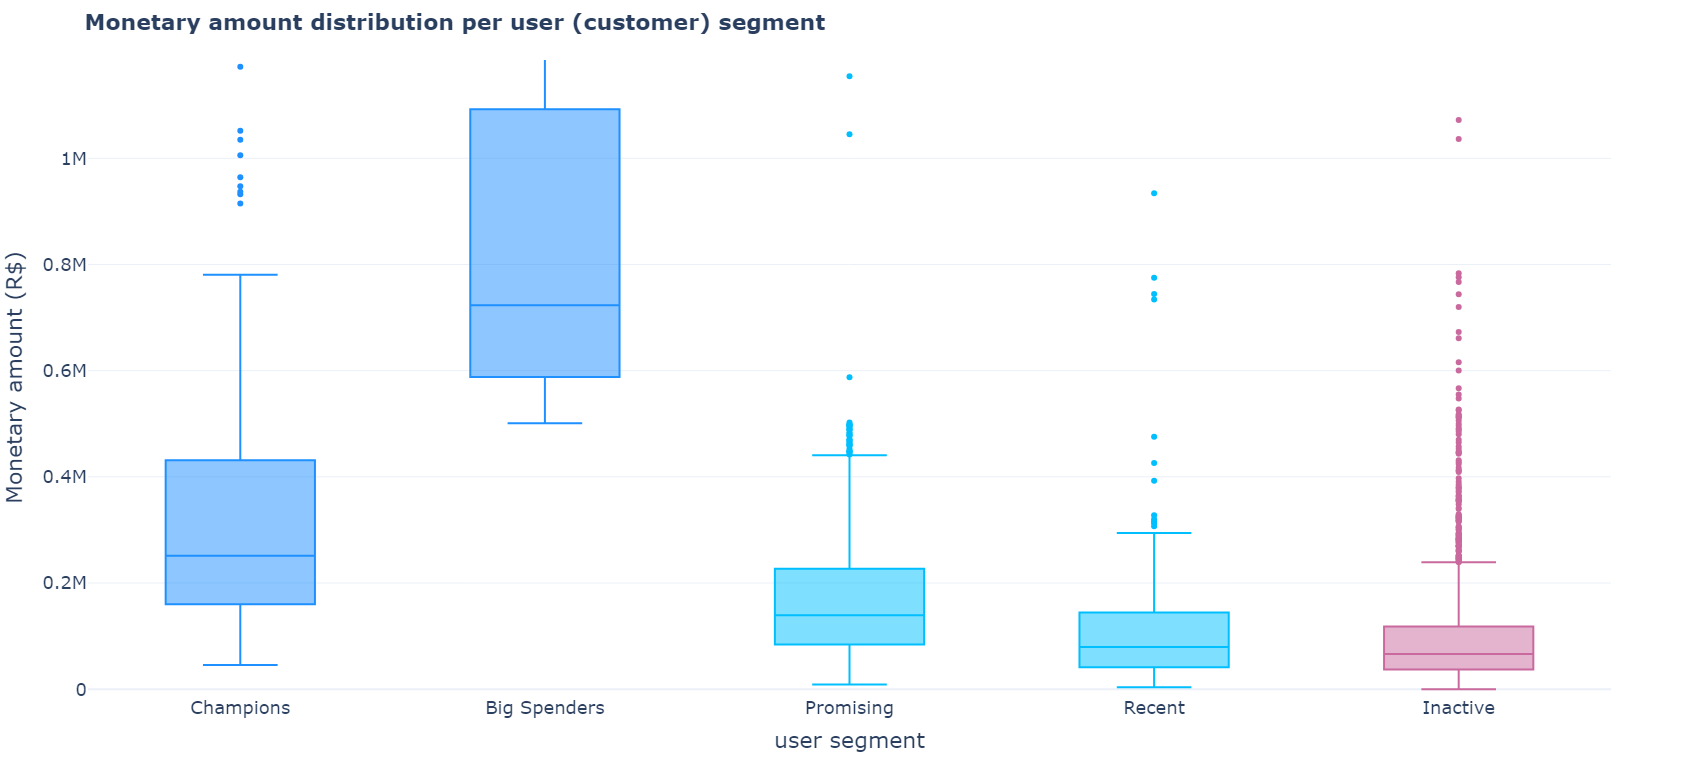

## ✅ checkpoint

In [56]:
df_users_segments = df_users[["user_id", "rfm_segment_desc"]]

In [57]:
df_users_segments.to_pickle("../data/processed/df_users_segments.pkl")

# Explanatory Analysis

In [58]:
df_loans = df_loans[["id", "user_id", "amount_bin", "due_amount_bin", "interest_rate_bin"]]

df_users = df_users[["user_id", "median_basket", "avg_intallments", "avg_lag_transaction", 
                     "rate_denied", "rate_transactions_installment", "rate_credit_debit", 
                     "credit_debit_preference", "ratio_online_person", "online_person_preference", "rfm_segment_desc"]]

df_loans_users = df_loans.merge(df_users, how="left", on="user_id").rename(columns={"id": "loan_id", "amount": "loan_amount"})

In [59]:
df_loan_repayments = df_loan_repayments[["id", "loan_id", "type", "amount", "status_cleaned", 
                                         "days_since_loan_created", "days_since_due_date", 
                                         "due_date_exceeded", "days_lag_repayment", "num_late_repayments"]]

df_loan_repayments = df_loan_repayments.rename(columns={"id": "repayment_id", "amount": "repayment_amount"})

df_data = df_loan_repayments.merge(df_loans_users, how="left", on="loan_id")

## Loan Principal Amount

**Note:** Smaller loans exhibit higher chances for default

In [60]:
labels = ["1k - 2k", "2k - 3k", "3k - 4k", "4k - 5k", "5k - 6k", "6k - 7k"]

fig = go.Figure([
    go.Bar(x=labels,
           y=[
               df_data[(df_data["amount_bin"] == label) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[df_data["amount_bin"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_blue"],
           name="paid"),
    go.Bar(x=labels,
           y=[
               df_data[(df_data["amount_bin"] == label) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[df_data["amount_bin"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_purple"],
           name="defaulted")
])

fig.update_layout(
    title='<b>Smaller loans exhibit higher chances for default</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="principal loan amount (R$)",
    yaxis_title="% of repayments",
    barmode="group",
    bargroupgap=0.1,
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_xaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{y:.0%}",
    textposition="inside"
)

fig.show()

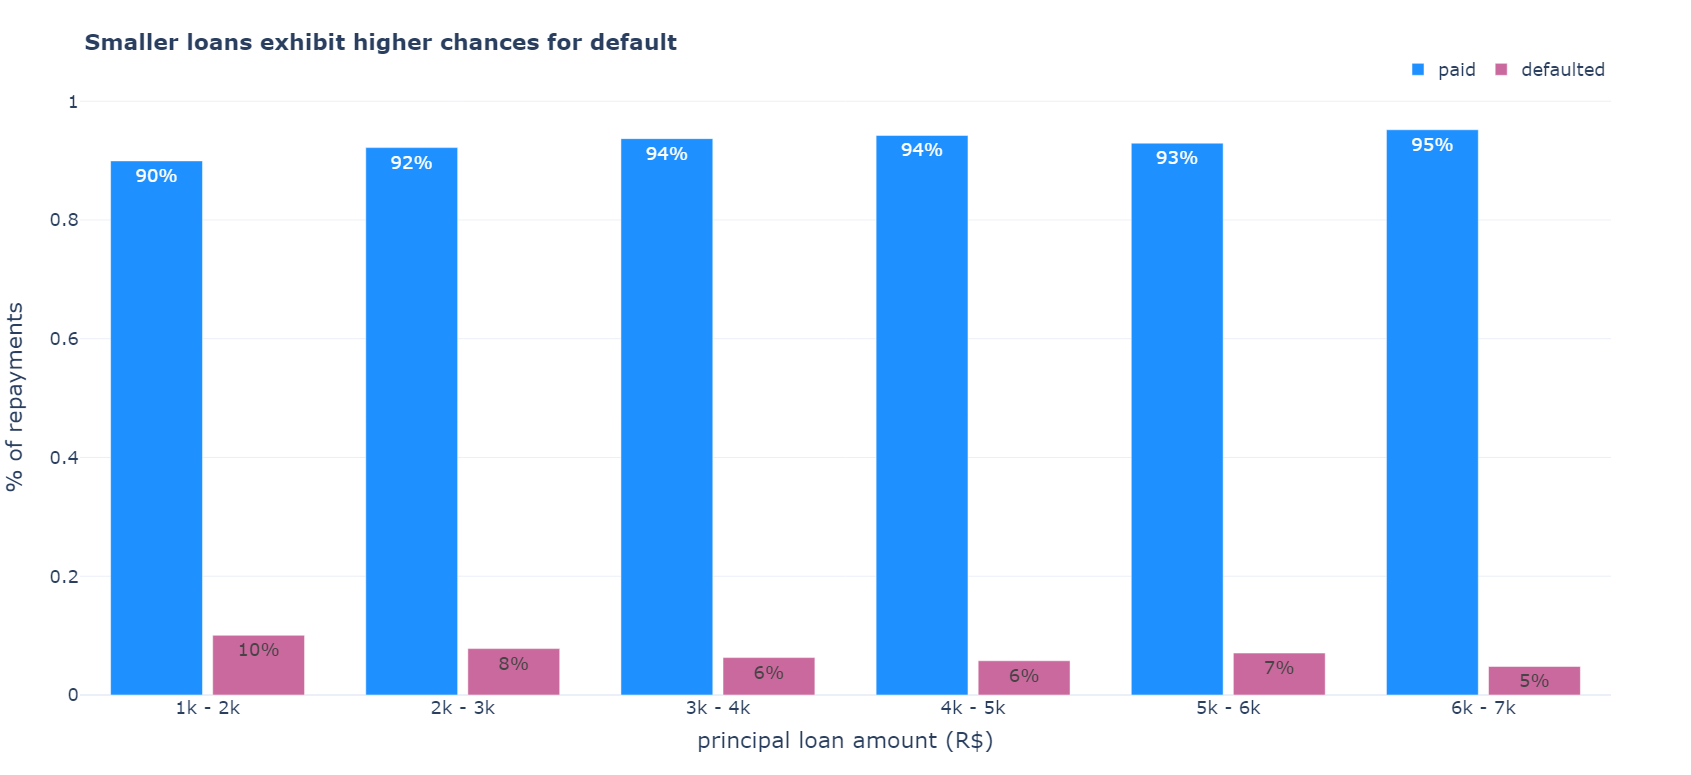

## Loan Repayments

**Note:** Users who opt for manual loan repayments are more likely to default

In [61]:
labels = ["autopilot", "pix"]

fig = go.Figure([
    go.Bar(y=labels,
           x=[
               df_data[(df_data["type"] == label) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[df_data["type"] == label]["repayment_id"].count() 
               for label in labels
           ],
           orientation="h",
           marker_color=colors["dark_blue"],
           name="paid"),
    go.Bar(y=labels,
           x=[
               df_data[(df_data["type"] == label) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[df_data["type"] == label]["repayment_id"].count() 
               for label in labels
           ],
           orientation="h",
           marker_color=colors["dark_purple"],
           name="defaulted")
])

fig.update_layout(
    title='<b>Users who opt for manual loan repayments are more likely to default</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of repayments",
    yaxis_title="repayment type",
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0%}",
    textposition="outside"
)

fig.show()

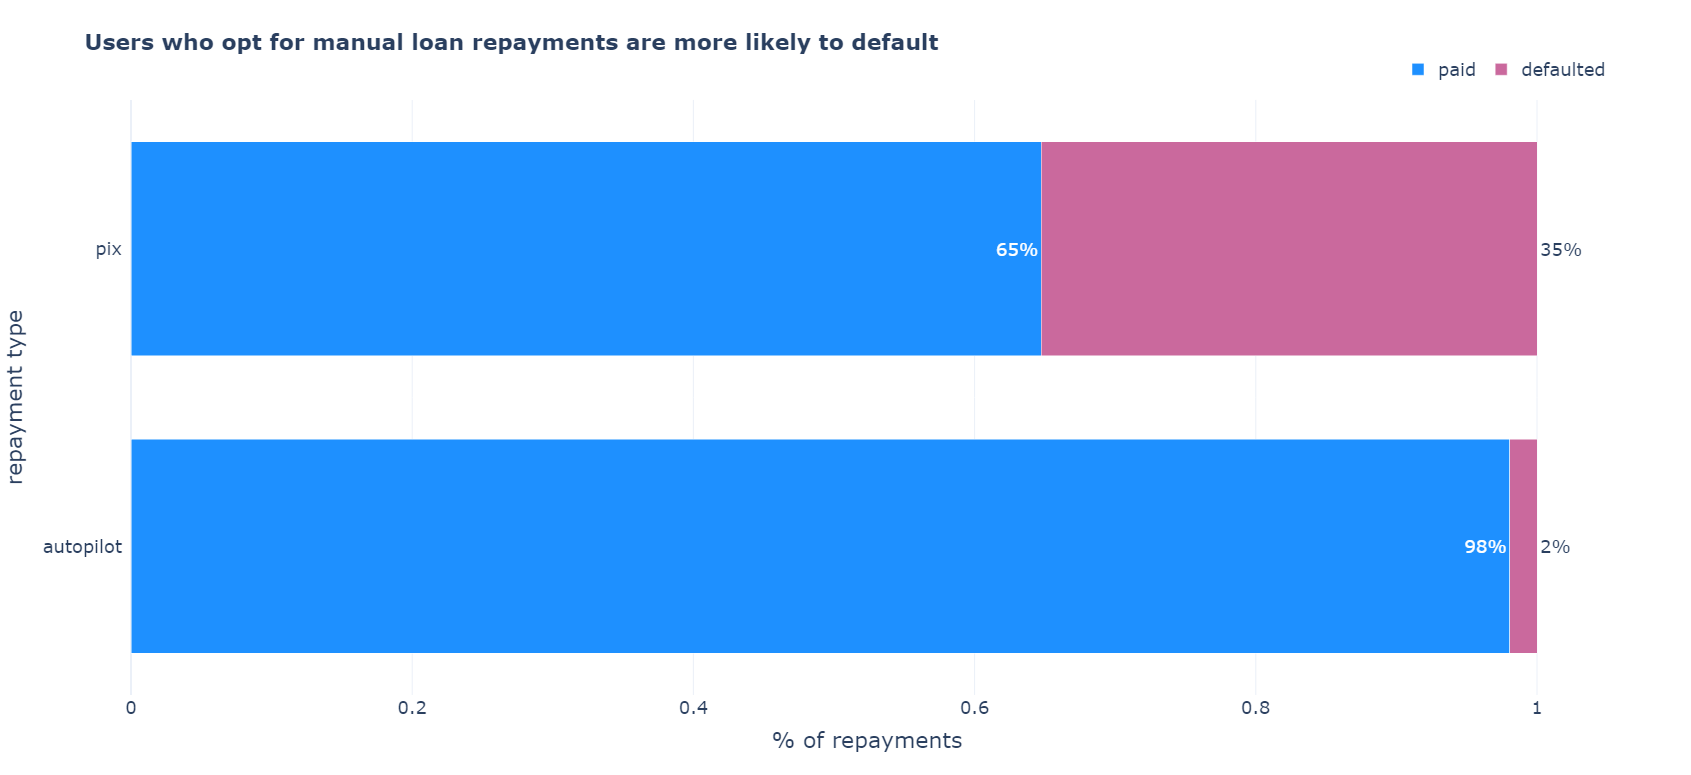

## Repayment Amount

TODO: bin

In [ ]:
# fig = px.box(
#     df_data[df_data["due_date_exceeded"] == "not exceeded"], 
#     y="repayment_amount", 
#     x="status_cleaned",
#     color="status_cleaned",
#     color_discrete_sequence=[colors["dark_blue"], colors["dark_purple"]],
# )

# fig.update_layout(
#     title='<b></b>',
#     title_font_size=title_font_size,
#     font_size=font_size,
#     xaxis_title=None,
#     yaxis_title="repayment amount (R$)",
#     template=template,
#     showlegend=False
# )

# fig.show()

## Days Passed From Loan Creation To Repayment

**Note:** Repayments aren't affected by the amount of time passed from loan creation to repayment date

In [62]:
fig = px.box(
    df_data, 
    y="days_since_loan_created", 
    x="status_cleaned",
    color="status_cleaned",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_purple"]],
)

fig.update_layout(
    title="<b>Repayments aren't affected by the amount of time passed from loan creation to repayment date</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title=None,
    yaxis_title="days since loan creation",
    showlegend=False,
    template=template,
)

fig.show()

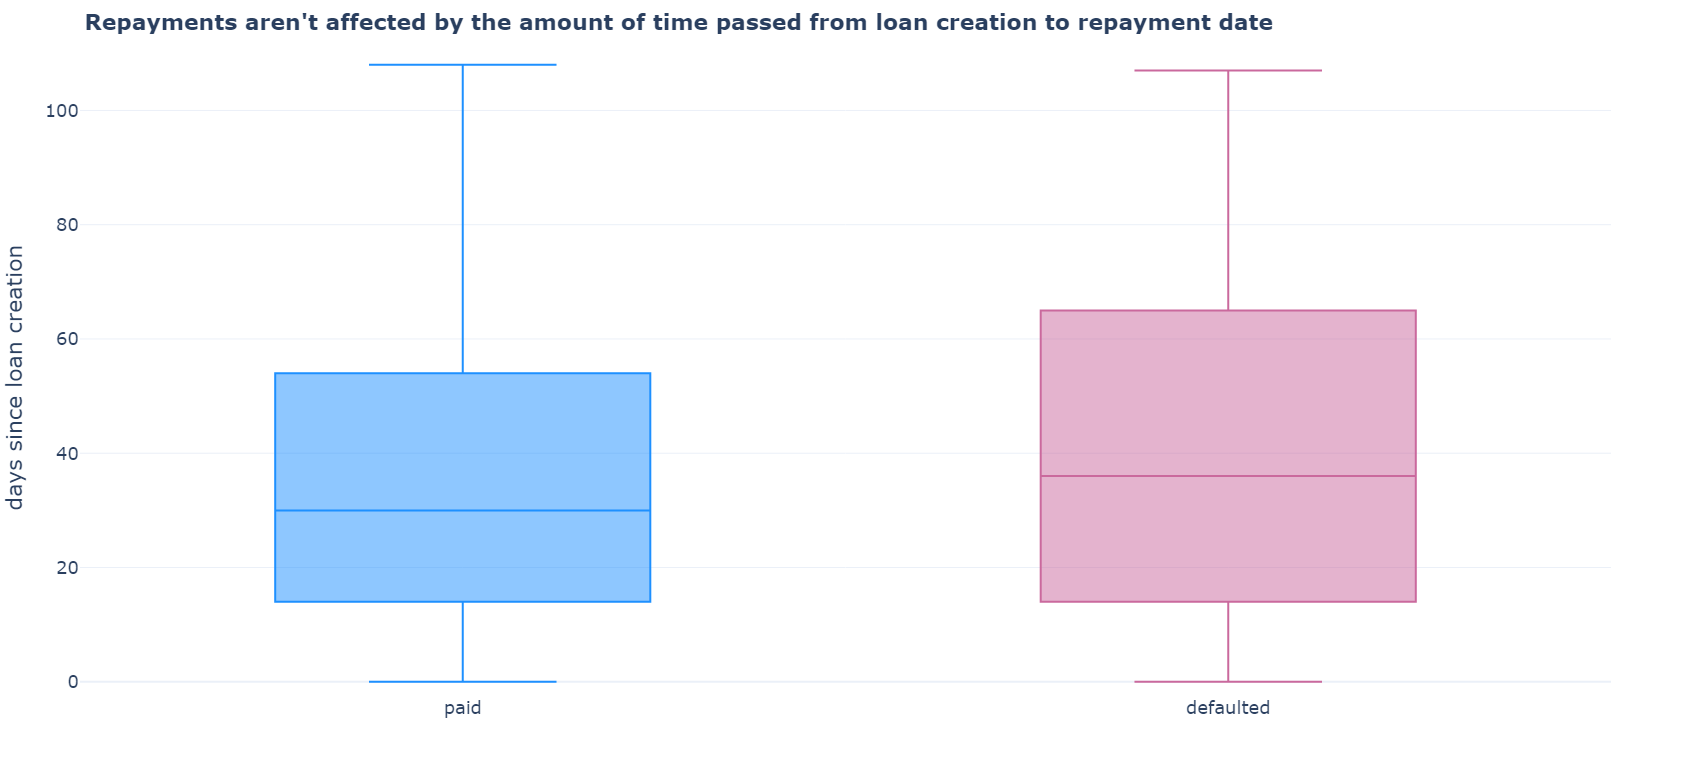

In [63]:
df_data.groupby("status_cleaned", as_index=False)["days_since_loan_created"].describe()

,status_cleaned,count,mean,std,min,25%,50%,75%,max
0,defaulted,8737.0,41.245164,30.916771,0.0,14.0,36.0,65.0,310.0
1,paid,163703.0,35.764488,26.261591,0.0,14.0,30.0,54.0,481.0


## Late Repayments

**Note:**
- There is still significant risk for a user to default even when the loan due date has been exceeded
- However, if they're given more time, or the remainder is split into multiple repayments, then it's likely that they'll repay the loan

In [64]:
labels = ["not exceeded", "exceeded"]

fig = go.Figure([
    go.Bar(y=labels,
           x=[
               df_data[(df_data["due_date_exceeded"] == label) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[df_data["due_date_exceeded"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_blue"],
           orientation="h",
           name="paid"),
    go.Bar(y=labels,
           x=[
               df_data[(df_data["due_date_exceeded"] == label) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[df_data["due_date_exceeded"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_purple"],
           orientation="h",
           name="defaulted")
])

fig.update_layout(
    title='<b>There is still significant risk for a user to default even when the loan due date has been exceeded</b>',
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of repayments",
    yaxis_title="due date exceeded",
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0%}",
    textposition="outside"
)

fig.show()

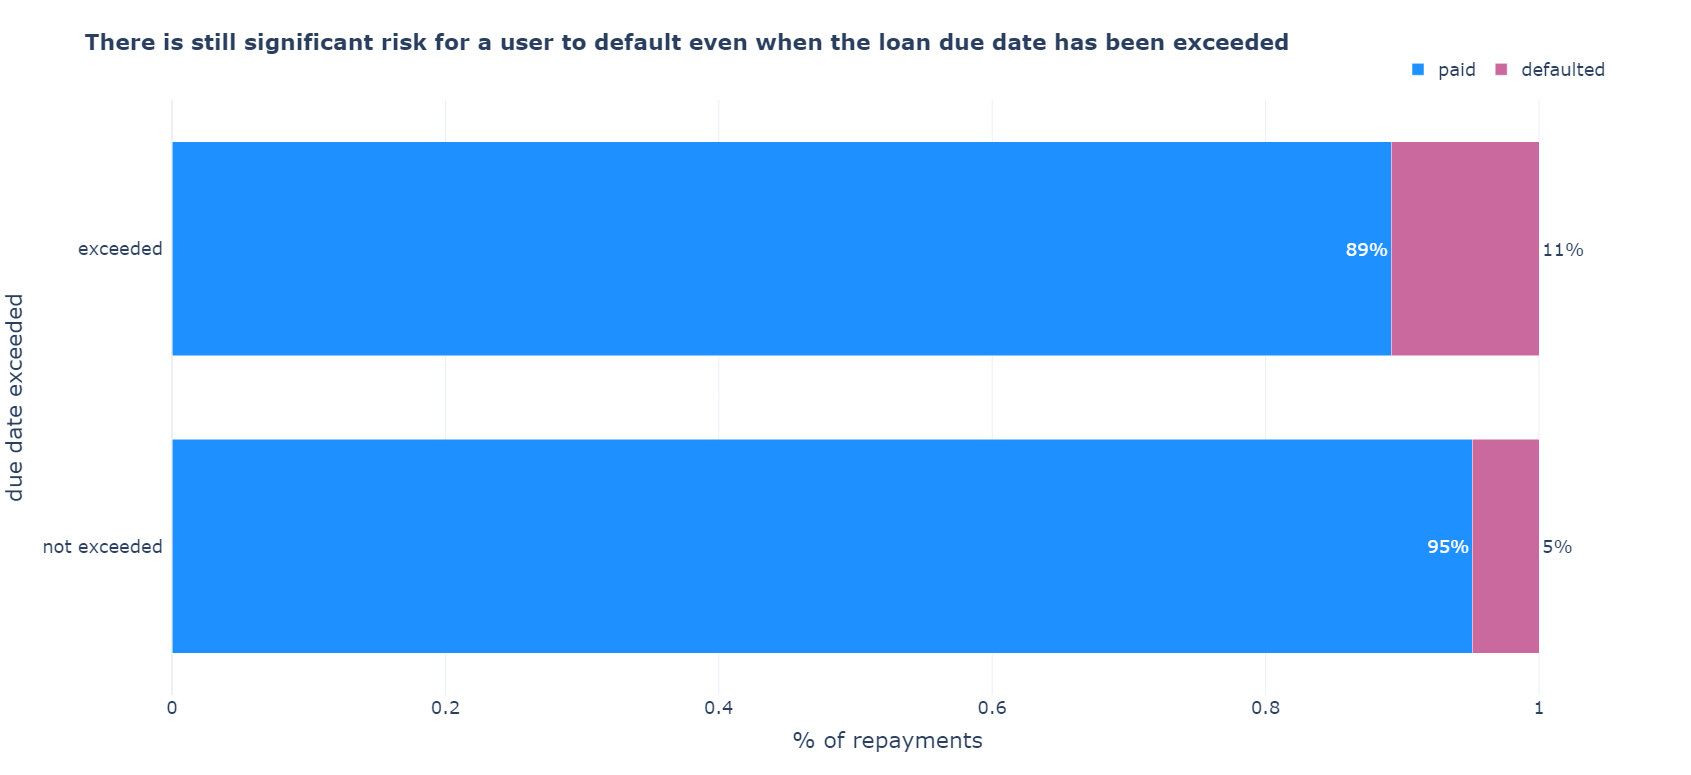

In [65]:
df_data[df_data["days_since_due_date"] > 0].groupby("status_cleaned", as_index=False)["days_since_due_date"].describe()

,status_cleaned,count,mean,std,min,25%,50%,75%,max
0,defaulted,609.0,6.862069,19.599376,1.0,1.0,3.0,8.0,220.0
1,paid,5018.0,6.650857,8.841982,1.0,3.0,6.0,10.0,391.0


## Repayment Lag

**Note:** Frequent repayments don't necessarily result in repayments

In [66]:
fig = px.box(
    df_data[df_data["due_date_exceeded"] == "not exceeded"], 
    y="days_lag_repayment", 
    x="status_cleaned",
    color="status_cleaned",
    color_discrete_sequence=[colors["dark_blue"], colors["dark_purple"]],
)

fig.update_layout(
    title="<b>Frequent repayments don't necessarily result in repayments</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title=None,
    yaxis_title="repayment lag (days)",
    showlegend=False,
    template=template,
)

fig.show()

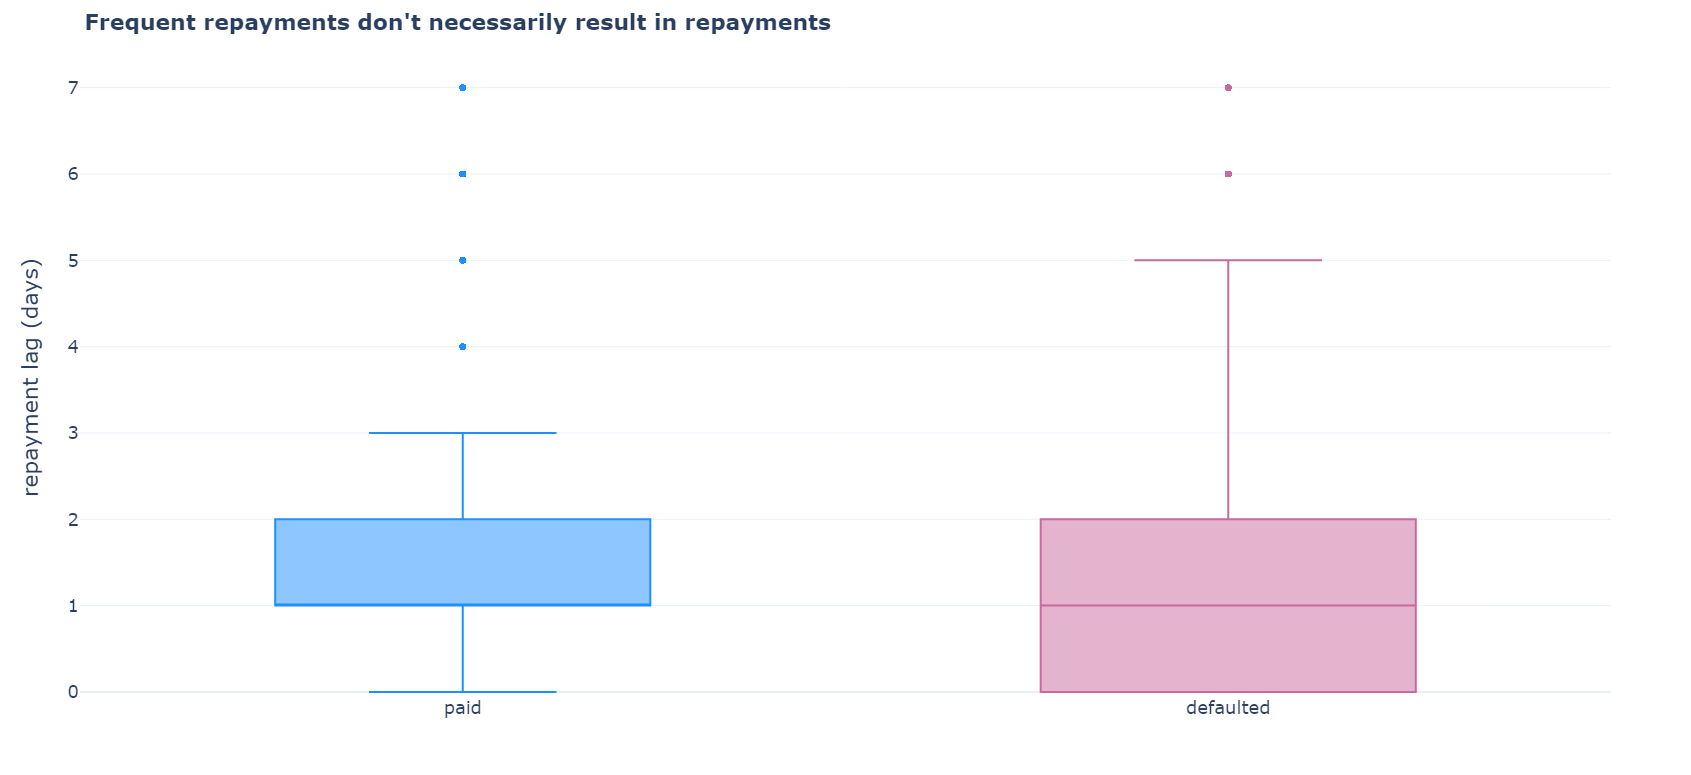

In [67]:
df_data[df_data["due_date_exceeded"] == "not exceeded"].groupby("status_cleaned", as_index=False)["days_lag_repayment"].describe()

,status_cleaned,count,mean,std,min,25%,50%,75%,max
0,defaulted,8128.0,2.232776,6.303368,0.0,0.0,1.0,2.0,89.0
1,paid,158685.0,2.080820,3.402038,0.0,1.0,1.0,2.0,90.0


## RFM Segment

**Note:** Customers with lower activity levels (purchasing frequency and expenditure) present a higher risk of default

In [68]:
labels = ["Inactive", "Recent", "Promising", "Big Spenders", "Champions",]

fig = go.Figure([
    go.Bar(y=labels,
           x=[
               df_data[(df_data["rfm_segment_desc"] == label) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[df_data["rfm_segment_desc"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_blue"],
           orientation="h",
           name="paid"),
    go.Bar(y=labels,
           x=[
               df_data[(df_data["rfm_segment_desc"] == label) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[df_data["rfm_segment_desc"] == label]["repayment_id"].count() 
               for label in labels
           ],
           marker_color=colors["dark_purple"],
           orientation="h",
           name="defaulted")
])

fig.update_layout(
    title="<b>Customers with lower activity levels (purchasing frequency and expenditure)<br>present a higher risk of default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    xaxis_title="% of repayments",
    yaxis_title="user segment",
    barmode="stack",
    bargroupgap=0.1,
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_yaxes(
    categoryorder='array', 
    categoryarray=labels
)
fig.update_traces(
    texttemplate="%{x:.0%}",
    textposition="inside"
)

fig.show()

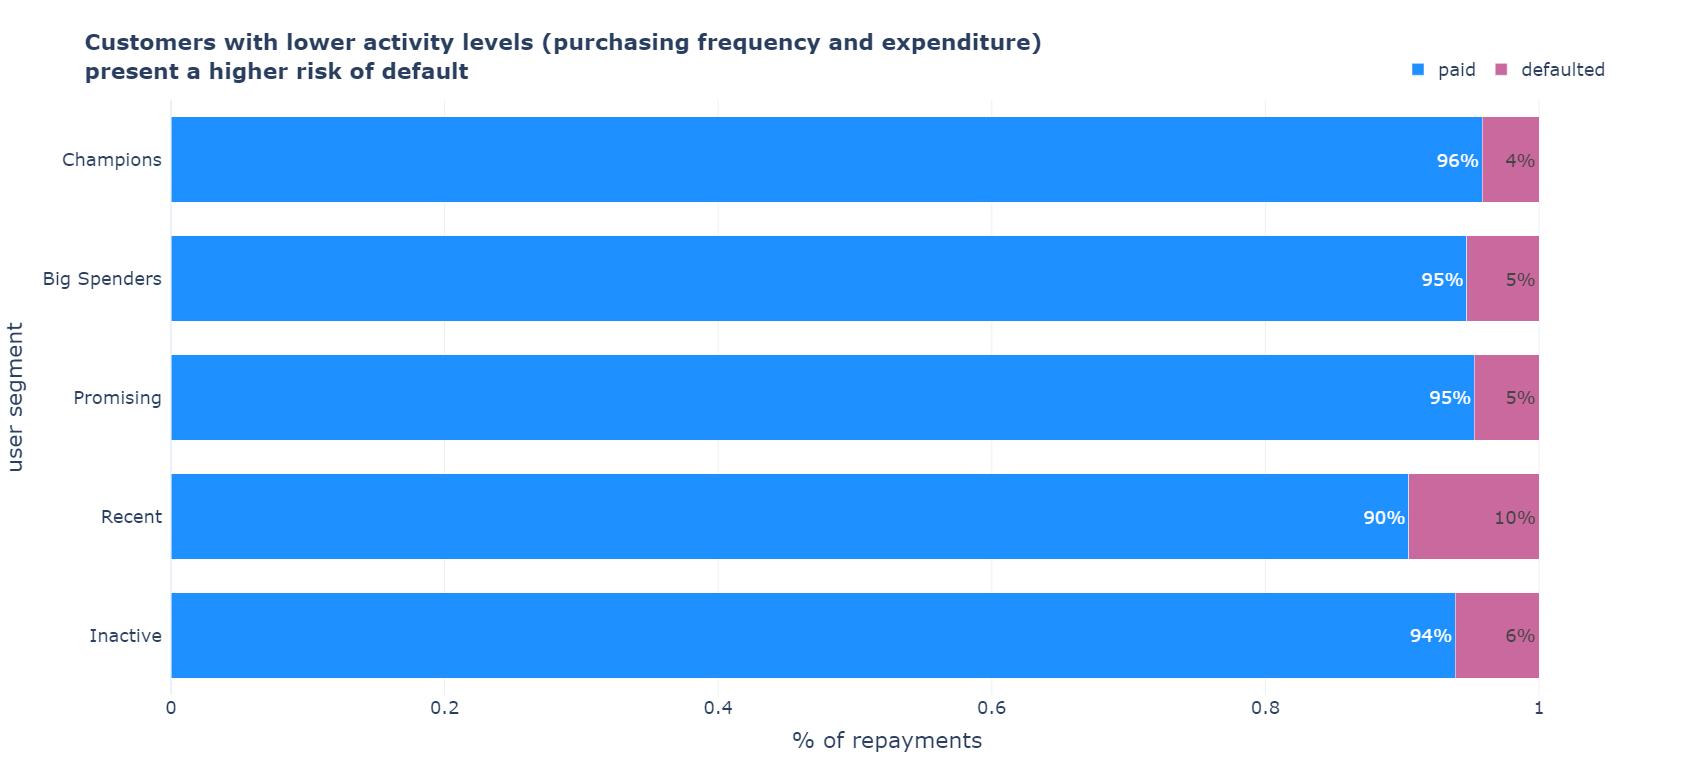

## Card Type Preference

**Note:** Big Spenders and Recent customers who prefer credit cards over debit cards tend to have a higher risk of default

In [123]:
labels = ["debit", "credit"]
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["credit_debit_preference"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[(df_data["credit_debit_preference"] == label) & (df_data["rfm_segment_desc"] == segment)]["repayment_id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_blue"],
            name="paid"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["credit_debit_preference"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[(df_data["credit_debit_preference"] == label) & (df_data["rfm_segment_desc"] == segment)]["repayment_id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_purple"],
            name="defaulted"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Big Spenders and Recent customers who prefer credit cards over debit cards<br>tend to have a higher risk of default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="% of repayments",
    barmode="stack",
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0%}",
    textposition="outside"
)
fig.update_annotations(font_size=font_size)

fig.show()

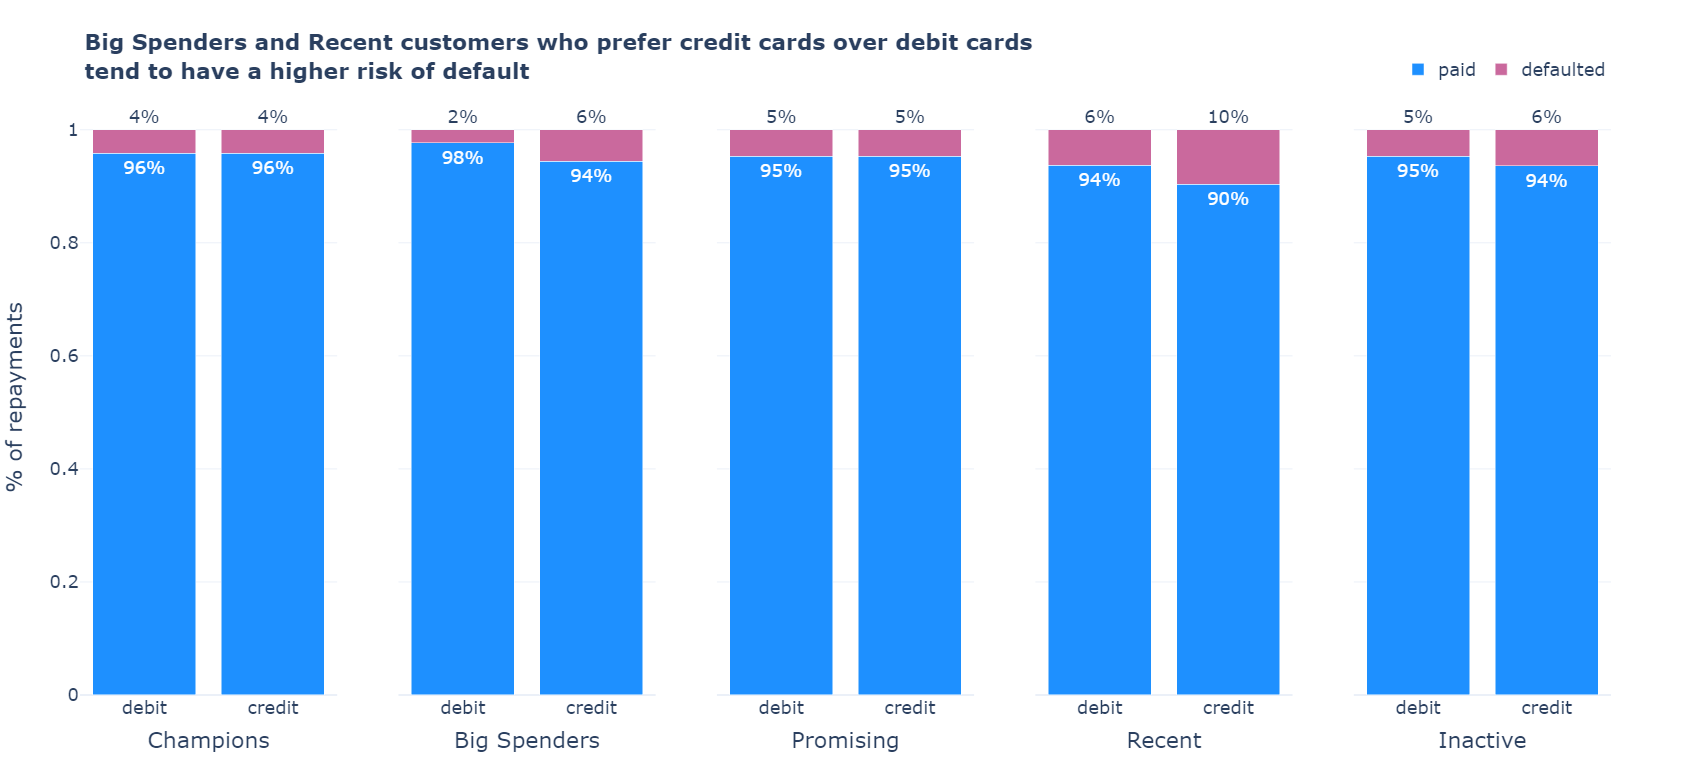

## Installment Preference

**Note:** Big Spenders and Inactive customers who prefer installment plans have a higher risk of default

In [148]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "paid")]["rate_transactions_installment"],
            showlegend=False,
            marker_color=colors["dark_blue"],
            name="paid"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "defaulted")]["rate_transactions_installment"], 
            showlegend=False,
            marker_color=colors["dark_purple"],
            name="defaulted"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Big Spenders and Inactive customers who prefer installment plans have a higher risk of default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="transactions with installments ratio",
    template=template,
)
fig.update_annotations(font_size=font_size)

fig.show()

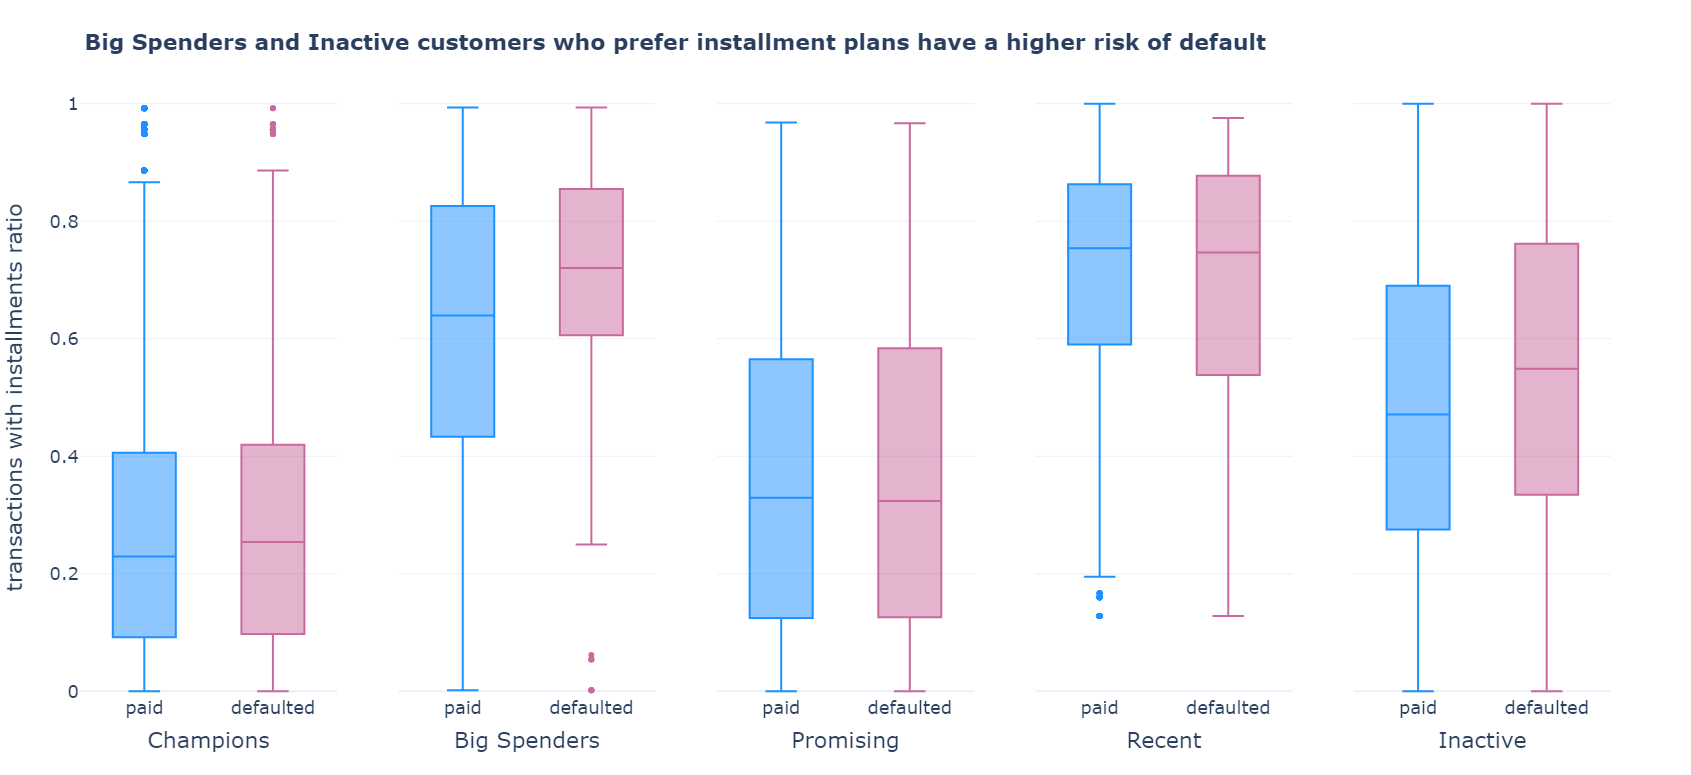

## Denied Transactions

**Note:** Big Spenders, Recent and Inactive customers who have a high ratio of denied transactions are more prone to default

In [152]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "paid")]["rate_denied"],
            showlegend=False,
            marker_color=colors["dark_blue"],
            name="paid"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "defaulted")]["rate_denied"], 
            showlegend=False,
            marker_color=colors["dark_purple"],
            name="defaulted"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b>Big Spenders, Recent and Inactive customers who have<br>a high ratio of denied transactions are more prone to default</b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="denied transactions ratio",
    template=template,
)
fig.update_annotations(font_size=font_size)

fig.show()

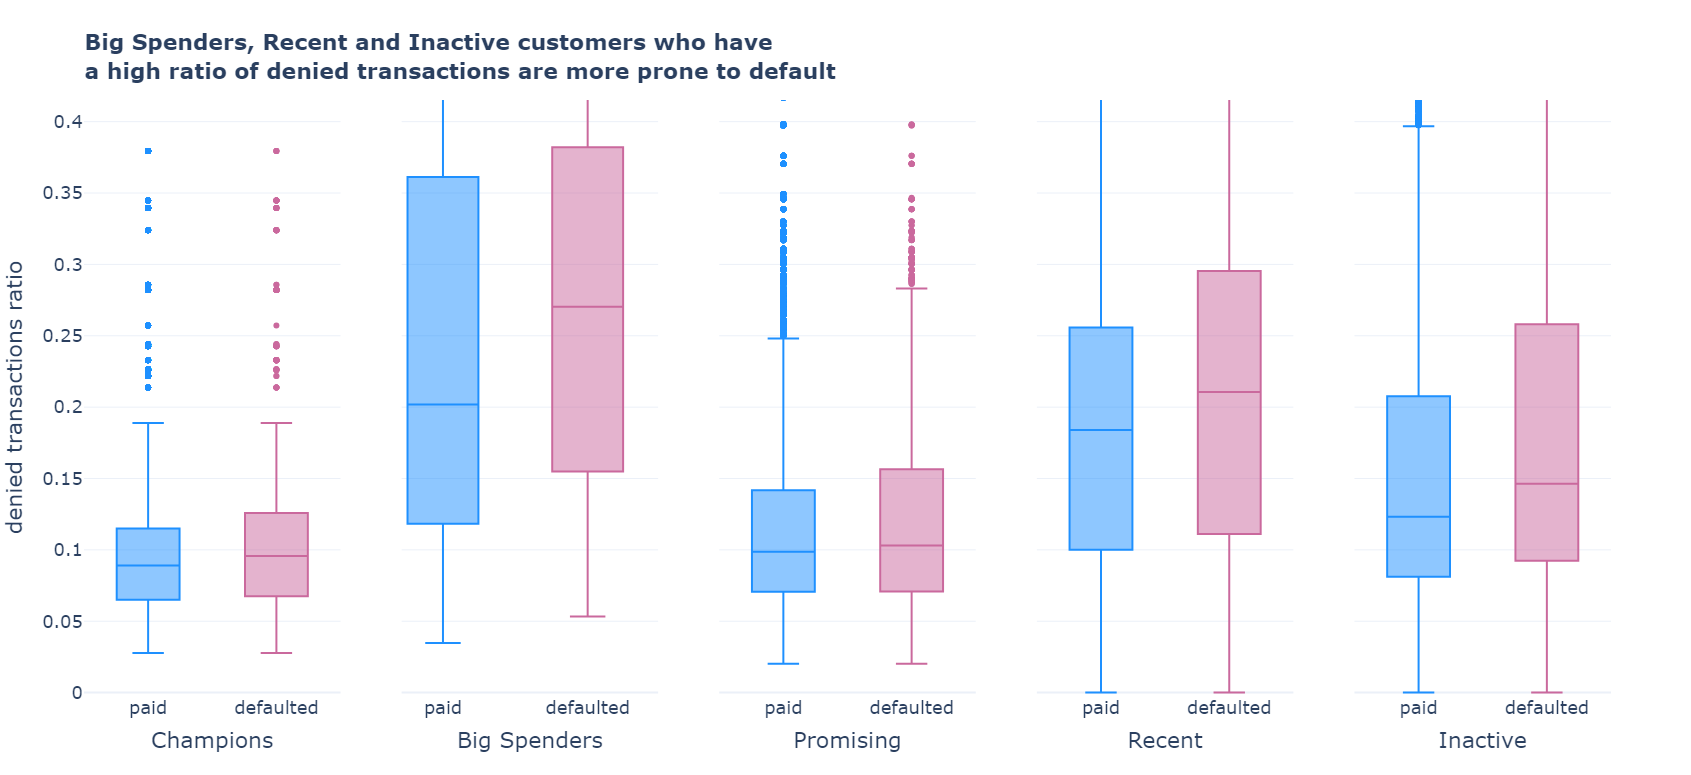

## Purchase Mode

TODO: title

In [156]:
labels = ["in-person", "online"]
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["online_person_preference"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "paid")]["repayment_id"].count() \
               / df_data[(df_data["online_person_preference"] == label) & (df_data["rfm_segment_desc"] == segment)]["repayment_id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_blue"],
            name="paid"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Bar(
            y=[
               df_data[(df_data["online_person_preference"] == label) & (df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "defaulted")]["repayment_id"].count() \
               / df_data[(df_data["online_person_preference"] == label) & (df_data["rfm_segment_desc"] == segment)]["repayment_id"].count() 
               for label in labels
            ], 
            x=labels,
            showlegend=True if i == 0 else False,
            marker_color=colors["dark_purple"],
            name="defaulted"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b></b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="% of repayments",
    barmode="stack",
    legend=dict(
        traceorder="normal",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template=template,
)
fig.update_traces(
    texttemplate="%{y:.0%}",
    textposition="outside"
)
fig.update_annotations(font_size=font_size)

fig.show()

## Median Basket

TODO: title and or barchart

In [158]:
segments = ["Champions", "Big Spenders", "Promising", "Recent", "Inactive"]

fig = make_subplots(
    rows=1, 
    cols=df_data["rfm_segment_desc"].unique().shape[0],
    shared_yaxes=True,
    vertical_spacing=0.001,
)
for i, segment in enumerate(segments):
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "paid")]["median_basket"],
            showlegend=False,
            marker_color=colors["dark_blue"],
            name="paid"
        ),
        row=1, 
        col=i+1
    )
    fig.add_trace(
        go.Box(
            y=df_data[(df_data["rfm_segment_desc"] == segment) & (df_data["status_cleaned"] == "defaulted")]["median_basket"], 
            showlegend=False,
            marker_color=colors["dark_purple"],
            name="defaulted"
        ),
        row=1, 
        col=i+1
    )
    fig.update_xaxes(title_text=f"{segment}", row=1, col=i+1)

fig.update_layout(
    title="<b></b>",
    title_font_size=title_font_size,
    font_size=font_size,
    yaxis_title="median basket (R$)",
    template=template,
)
fig.update_annotations(font_size=font_size)

fig.show()